In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df1 = pd.read_excel('train.xlsx')

df1.head()
df1.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [131]:
df1= df1.replace({-1:np.nan , -1.0 : np.nan})

In [132]:
df1['Domain'].fillna(df1['Domain'].mean(),inplace=True)

In [133]:
df1['ComputerProgramming'].fillna(0 , inplace=True)
df1['ElectronicsAndSemicon'].fillna(0 , inplace=True)
df1['ComputerScience'].fillna(0 , inplace=True)
df1['MechanicalEngg'].fillna(0 , inplace=True)
df1['ElectricalEngg'].fillna(0 , inplace=True)
df1['TelecomEngg'].fillna(0 ,inplace=True)
df1['CivilEngg'].fillna(0 , inplace=True)
#these columns had missing values as -1
# the same values were replaced by np.nan for a robust analysis
# the nan values have been imputed as zero as these scores are determined by the tests the students take

In [134]:
df1 = df1.drop(['Unnamed: 0','ID'],1)
data = df1.copy(deep=True)

In [135]:
df1 = df1.drop(['DOJ', 'DOL'],1)

In [136]:
df1['Gender']=df1['Gender'].replace({'m':'M','f':'F'})

In [137]:
df1['DOB'] = df1['DOB'].dt.strftime('%Y')

In [138]:
df1['10board']=df1['10board'].replace(0,"N/A")
df1['10board']=df1['10board'].replace('icse board',"icse")
df1['10board']=df1['10board'].replace('cicse',"icse")
df1['10board']=df1['10board'].replace('icse board , new delhi',"icse")
df1['10board']=df1['10board'].replace('cbsc',"cbse")
df1['10board']=df1['10board'].replace('delhi public school',"cbse")
df1['10board']=df1['10board'].replace('cbse board',"cbse")
df1['10board']=df1['10board'].replace('cbse ',"cbse")
df1['10board']=df1['10board'].replace('delhi board',"cbse")

In [139]:
df1['10board']=df1['10board'].fillna(method='ffill')

In [140]:
list1 = list(df1['10board'].value_counts().index)
list1.remove('icse')
list1.remove('cbse')
list1

['state board',
 'N/A',
 'ssc',
 'up board',
 'matriculation',
 'rbse',
 'board of secondary education',
 'up',
 'mp board',
 'sslc',
 'wbbse',
 'central board of secondary education',
 'kseeb',
 'upboard',
 'maharashtra state board',
 'karnataka state board',
 'bseb',
 'state',
 'maharashtra board',
 'pseb',
 'uttar pradesh board',
 'karnataka secondary education examination board',
 'karnataka secondary education board',
 'bse',
 'rajasthan board',
 'hbse',
 'gseb',
 'west bengal board of secondary education',
 'u p board',
 'matriculation board',
 'secondary school of education',
 'uttarakhand board',
 'stateboard',
 'bseb,patna',
 'uttar pradesh',
 'matric',
 'mp',
 'hbsc',
 'maharashtra',
 'rajasthan board of secondary education',
 'anglo indian',
 'bse,orissa',
 'bihar board',
 'board of secondary education,ap',
 'sslc board',
 'bihar school examination board',
 'karnataka state secondary education board',
 'board of secondary education,andhra pradesh',
 'matric board',
 'mpbse',

In [141]:
for i in range(df1.shape[0]):
    if df1['10board'][i] in list1:
        df1['10board'][i]='State Board'

In [142]:
df1['10board']=df1['10board'].replace('cbse','CBSE')
df1['10board']=df1['10board'].replace('icse','ICSE')

In [143]:
df1['12board']=df1['12board'].replace('council for indian school certificate examination','ISC')
df1['12board']=df1['12board'].replace('cbsc','CBSE')
df1['12board']=df1['12board'].replace('cbse,new delhi','CBSE')
df1['12board']=df1['12board'].replace('cbse','CBSE')
df1['12board']=df1['12board'].replace('icse','ISC')
df1['12board']=df1['12board'].replace('isc','ISC')
df1['12board']=df1['12board'].replace(0,'N/A')
df1['12board']=df1['12board'].replace('central board of secondary education','CBSE')
df1['12board']=df1['12board'].replace('isc board , new delhi','ISC')
df1['12board']=df1['12board'].replace('cbese','CBSE')
df1['12board']=df1['12board'].replace('isc board','ISC')
df1['12board']=df1['12board'].replace('cicse','ISC')
df1['12board']=df1['12board'].replace('isce','ISC')

In [144]:
df1['12board']=df1['12board'].fillna(method='ffill')

In [145]:
list2 = list(df1['12board'].value_counts().index)
list2.remove('ISC')
list2.remove('CBSE')
list2

['state board',
 'N/A',
 'up board',
 'board of intermediate',
 'board of intermediate education',
 'up',
 'rbse',
 'mp board',
 'bie',
 'ipe',
 'chse',
 'hsc',
 'maharashtra state board',
 'wbchse',
 'maharashtra board',
 'puc',
 'pu board',
 'matriculation',
 'intermediate',
 'state',
 'hbse',
 'uttar pradesh board',
 'nios',
 'upboard',
 'pseb',
 'ssc',
 'bseb',
 'board of intermediate education,ap',
 'karnataka state board',
 'stateboard',
 'msbte',
 'u p board',
 'rajasthan board',
 'west bengal council of higher secondary education',
 'intermediate board',
 'bieap',
 'biec,patna',
 'uttarakhand board',
 'karnataka pre university board',
 'mp',
 'chse,orissa',
 'board of intermediate education, ap',
 'sbtet',
 'pre-university',
 'jharkhand academic council',
 'bihar intermediate education council',
 'karnataka pu board',
 'karnataka pre-university board',
 'maharashtra',
 'uttar pradesh',
 'department of pre-university education',
 'board of intermediate education, andhra pradesh'

In [146]:
for i in range(df1.shape[0]):
    if df1['12board'][i] in list2:
        df1['12board'][i]='State Board'

In [147]:
df1['Specialization']=df1['Specialization'].replace({'electronics and communication engineering':'electronics engineering', 
                                 'information technology':'computer science & engineering',
                                 'computer engineering':'computer science & engineering', 
                                 'computer application':'computer science & engineering', 
                                 'electronics and electrical engineering':'electronics engineering',
                                 'electronics & telecommunications':'electronics engineering', 
                                 'electrical engineering':'electronics engineering',
                                 'electronics & instrumentation eng':'electronics engineering', 
                                 'electronics and instrumentation engineering':'electronics engineering',
                                 'information science engineering':'other',
                                 'instrumentation and control engineering':'other', 
                                 'electronics engineering':'electronics engineering',
                                 'biotechnology':'medical engineering', 
                                 'industrial & production engineering':'civil engineering',
                                 'chemical engineering':'medical engineering', 
                                 'applied electronics and instrumentation':'electronics engineering',
                                 'computer science and technology':'computer science & engineering', 
                                 'telecommunication engineering':'electronics engineering',
                                 'mechanical and automation':'mechanical engineering', 
                                 'automobile/automotive engineering':'mechanical engineering',
                                 'instrumentation engineering':'electronics engineering', 
                                 'mechatronics':'other',
                                 'electronics and computer engineering':'electronics engineering', 
                                 'aeronautical engineering':'other',
                                 'metallurgical engineering':'other', 
                                 'information & communication technology':'electronics engineering',
                                 'computer science':'computer science & engineering', 
                                 'industrial engineering':'civil engineering', 
                                 'biomedical engineering':'medical engineering',
                                 'electrical and power engineering':'electronics engineering', 
                                 'information science':'other',
                                 'polymer technology':'other', 
                                 'mechanical & production engineering':'mechanical engineering',
                                 'industrial & management engineering':'civil engineering', 
                                 'internal combustion engine':'mechanical engineering', 
                                 'computer networking':'computer science & engineering',
                                 'computer and communication engineering':'computer science & engineering',
                                 'power systems and automation':'electronics engineering',
                                 'control and instrumentation engineering':'other',
                                 'embedded systems technology':'other', 
                                 'ceramic engineering':'other',
                                 'application developer':'computer science & engineering',
                                 'electronics':'electronics engineering'})

In [148]:
df1['collegeGPA']=round(df1['collegeGPA']/10 , ndigits=2)

In [149]:
df1.loc[2664,'GraduationYear'] = 2014

In [150]:
num_data = df1.select_dtypes(include = np.number)
cat_data = df1.select_dtypes(exclude=np.number)

In [151]:
optional = ['ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
            'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
df_optional = df1[optional]
df_optional

,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg
0,445.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,466.0,0.0,0.0,0.0,0.0,0.0
2,395.0,0.0,0.0,0.0,0.0,0.0,0.0
3,615.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,233.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
3993,345.0,0.0,0.0,0.0,0.0,0.0,0.0
3994,325.0,420.0,0.0,0.0,0.0,0.0,0.0
3995,405.0,0.0,0.0,0.0,0.0,0.0,0.0
3996,445.0,0.0,438.0,0.0,0.0,0.0,0.0


In [152]:
l=[]
for i in range(len(df1)):
    c=0
    for j in optional:
        if df_optional.loc[i,j]!=0:
            c=c+1
        else:
            pass
    l.append(c)

In [153]:
df_optional['Count'] = l

In [154]:
df_optional['optional_marks']=(df_optional['ComputerProgramming']+df_optional['ElectronicsAndSemicon']+df_optional['ComputerScience']
+df_optional['MechanicalEngg']+df_optional['ElectricalEngg']+df_optional['TelecomEngg']+df_optional['CivilEngg'])/df_optional['Count']

In [155]:
df2 = df1.copy(deep=True)

In [156]:
df2 = df2.drop('JobCity',1)

In [157]:
df2['Number_Of_Optional_Subjects'] = df_optional['Count']
df2['Optional_Marks'] = df_optional['optional_marks']

In [158]:
salary = df2['Salary']

In [159]:
Salary_Class = []
for i in df2['Salary']:
    if i>300000:
        Salary_Class.append(1)
    else:
        Salary_Class.append(0)

In [160]:
df2['Optional_Marks'].fillna(0 , inplace=True)

In [161]:
df2['Age'] = 2018 - df1['DOB'].astype('int64')

In [162]:
df2.drop(['CollegeID','CollegeCityID'],1 , inplace=True)

In [163]:
df2.columns

Index(['Salary', 'Designation', 'Gender', 'DOB', '10percentage', '10board',
       '12graduation', '12percentage', '12board', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Number_Of_Optional_Subjects',
       'Optional_Marks', 'Age'],
      dtype='object')

In [164]:
df2['Salary_Class'] = Salary_Class

In [165]:
df2 = df2.drop(['Designation','DOB'],1)

In [166]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Salary                       3998 non-null   float64
 1   Gender                       3998 non-null   object 
 2   10percentage                 3998 non-null   float64
 3   10board                      3998 non-null   object 
 4   12graduation                 3998 non-null   float64
 5   12percentage                 3998 non-null   float64
 6   12board                      3998 non-null   object 
 7   CollegeTier                  3998 non-null   float64
 8   Degree                       3998 non-null   object 
 9   Specialization               3998 non-null   object 
 10  collegeGPA                   3998 non-null   float64
 11  CollegeCityTier              3998 non-null   float64
 12  CollegeState                 3998 non-null   object 
 13  GraduationYear    

In [167]:
df2['CollegeCityTier'] = df2['CollegeCityTier'].astype('object')
df2['CollegeTier'] = df2['CollegeTier'].astype('object')

In [168]:
df2['12graduation'] = df2['12graduation'].astype('int64')
df2['GraduationYear'] = df2['GraduationYear'].astype('int64')


In [169]:
cat_data = df2.select_dtypes(exclude = np.number)
num_data = df2.select_dtypes(include=np.number)

In [170]:
cat_data

,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState
0,F,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,0,Andhra Pradesh
1,M,CBSE,CBSE,2,B.Tech/B.E.,electronics engineering,0,Madhya Pradesh
2,F,CBSE,CBSE,2,B.Tech/B.E.,computer science & engineering,0,Uttar Pradesh
3,M,CBSE,CBSE,1,B.Tech/B.E.,computer science & engineering,1,Delhi
4,M,CBSE,CBSE,2,B.Tech/B.E.,electronics engineering,0,Uttar Pradesh
...,...,...,...,...,...,...,...,...
3993,M,CBSE,CBSE,2,B.Tech/B.E.,computer science & engineering,0,Haryana
3994,F,State Board,State Board,2,B.Tech/B.E.,electronics engineering,1,Telangana
3995,M,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,0,Orissa
3996,F,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,1,Karnataka


In [171]:
cat_data = cat_data.drop(['CollegeState'],1)

In [172]:
cat_data

,Gender,10board,12board,CollegeTier,Degree,Specialization,CollegeCityTier
0,F,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,0
1,M,CBSE,CBSE,2,B.Tech/B.E.,electronics engineering,0
2,F,CBSE,CBSE,2,B.Tech/B.E.,computer science & engineering,0
3,M,CBSE,CBSE,1,B.Tech/B.E.,computer science & engineering,1
4,M,CBSE,CBSE,2,B.Tech/B.E.,electronics engineering,0
...,...,...,...,...,...,...,...
3993,M,CBSE,CBSE,2,B.Tech/B.E.,computer science & engineering,0
3994,F,State Board,State Board,2,B.Tech/B.E.,electronics engineering,1
3995,M,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,0
3996,F,State Board,State Board,2,B.Tech/B.E.,computer science & engineering,1


In [173]:
cat_data_final = pd.get_dummies(cat_data)

In [174]:
num_data

,Salary,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Domain,...,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Number_Of_Optional_Subjects,Optional_Marks,Age,Salary_Class
0,420000.0,84.30,2007,95.80,7.80,2011,515.0,585.0,525.0,0.635979,...,0.0,0.9737,0.8128,0.5269,1.35490,-0.4455,1,445.0,28,1
1,500000.0,85.40,2007,85.00,7.01,2012,695.0,610.0,780.0,0.960603,...,0.0,-0.7335,0.3789,1.2396,-0.10760,0.8637,1,466.0,29,1
2,325000.0,85.00,2010,68.20,7.00,2014,615.0,545.0,370.0,0.450877,...,0.0,0.2718,1.7109,0.1637,-0.86820,0.6721,1,395.0,26,1
3,1100000.0,85.60,2007,83.60,7.46,2011,635.0,585.0,625.0,0.974396,...,0.0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1,615.0,29,1
4,200000.0,78.00,2008,76.80,7.39,2012,545.0,625.0,465.0,0.124502,...,0.0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,233.0,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000.0,52.09,2006,55.50,6.15,2010,365.0,334.0,475.0,0.276047,...,0.0,-0.1082,0.3448,0.2366,0.64980,-0.9194,1,345.0,31,0
3994,100000.0,90.00,2009,93.00,7.73,2013,415.0,410.0,535.0,0.881620,...,0.0,-0.3027,0.8784,0.9322,0.77980,-0.0943,2,372.5,26,0
3995,320000.0,81.86,2008,65.50,7.00,2012,475.0,475.0,465.0,0.488348,...,0.0,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,1,405.0,27,1
3996,200000.0,78.72,2010,69.88,7.04,2014,450.0,410.0,320.0,0.744758,...,0.0,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,2,441.5,26,0


In [175]:
num_data_noclass = num_data.drop('Salary_Class',1)

In [176]:
scaled_scores = num_data_noclass[['Domain','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]

In [177]:
num_data_noclass = num_data_noclass.drop(scaled_scores,1)

In [178]:
num_data_noclass

,Salary,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,Number_Of_Optional_Subjects,Optional_Marks,Age
0,420000.0,84.30,2007,95.80,7.80,2011,515.0,585.0,525.0,445.0,0.0,0.0,0.0,0.0,0.0,0.0,1,445.0,28
1,500000.0,85.40,2007,85.00,7.01,2012,695.0,610.0,780.0,0.0,466.0,0.0,0.0,0.0,0.0,0.0,1,466.0,29
2,325000.0,85.00,2010,68.20,7.00,2014,615.0,545.0,370.0,395.0,0.0,0.0,0.0,0.0,0.0,0.0,1,395.0,26
3,1100000.0,85.60,2007,83.60,7.46,2011,635.0,585.0,625.0,615.0,0.0,0.0,0.0,0.0,0.0,0.0,1,615.0,29
4,200000.0,78.00,2008,76.80,7.39,2012,545.0,625.0,465.0,0.0,233.0,0.0,0.0,0.0,0.0,0.0,1,233.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000.0,52.09,2006,55.50,6.15,2010,365.0,334.0,475.0,345.0,0.0,0.0,0.0,0.0,0.0,0.0,1,345.0,31
3994,100000.0,90.00,2009,93.00,7.73,2013,415.0,410.0,535.0,325.0,420.0,0.0,0.0,0.0,0.0,0.0,2,372.5,26
3995,320000.0,81.86,2008,65.50,7.00,2012,475.0,475.0,465.0,405.0,0.0,0.0,0.0,0.0,0.0,0.0,1,405.0,27
3996,200000.0,78.72,2010,69.88,7.04,2014,450.0,410.0,320.0,445.0,0.0,438.0,0.0,0.0,0.0,0.0,2,441.5,26


In [179]:
num_data_noclass = num_data_noclass.drop(optional,1)

In [180]:
num_data_noclass

,Salary,10percentage,12graduation,12percentage,collegeGPA,GraduationYear,English,Logical,Quant,Number_Of_Optional_Subjects,Optional_Marks,Age
0,420000.0,84.30,2007,95.80,7.80,2011,515.0,585.0,525.0,1,445.0,28
1,500000.0,85.40,2007,85.00,7.01,2012,695.0,610.0,780.0,1,466.0,29
2,325000.0,85.00,2010,68.20,7.00,2014,615.0,545.0,370.0,1,395.0,26
3,1100000.0,85.60,2007,83.60,7.46,2011,635.0,585.0,625.0,1,615.0,29
4,200000.0,78.00,2008,76.80,7.39,2012,545.0,625.0,465.0,1,233.0,27
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000.0,52.09,2006,55.50,6.15,2010,365.0,334.0,475.0,1,345.0,31
3994,100000.0,90.00,2009,93.00,7.73,2013,415.0,410.0,535.0,2,372.5,26
3995,320000.0,81.86,2008,65.50,7.00,2012,475.0,475.0,465.0,1,405.0,27
3996,200000.0,78.72,2010,69.88,7.04,2014,450.0,410.0,320.0,2,441.5,26


In [181]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
num_scaled = pd.DataFrame(sc.fit_transform(num_data_noclass),columns = num_data_noclass.columns)

In [182]:
x_sc1 = pd.concat((cat_data_final,num_scaled,scaled_scores),1)
x_sc1.head()
#

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,...,Quant,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1,0,0,0,1,0,0,1,0,1,...,0.095037,-0.747762,0.294206,0.241881,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455
1,0,1,1,0,0,1,0,0,0,1,...,2.180295,-0.747762,0.469580,0.807731,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,1,0,1,0,0,1,0,0,0,1,...,-1.172473,-0.747762,-0.123351,-0.889820,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721
3,0,1,1,0,0,1,0,0,1,0,...,0.912785,-0.747762,1.713898,0.807731,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,0,1,1,0,0,1,0,0,0,1,...,-0.395612,-0.747762,-1.476233,-0.323970,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [183]:
y = Salary_Class

In [184]:
x_sc1

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,...,Quant,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1,0,0,0,1,0,0,1,0,1,...,0.095037,-0.747762,0.294206,0.241881,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455
1,0,1,1,0,0,1,0,0,0,1,...,2.180295,-0.747762,0.469580,0.807731,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,1,0,1,0,0,1,0,0,0,1,...,-1.172473,-0.747762,-0.123351,-0.889820,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721
3,0,1,1,0,0,1,0,0,1,0,...,0.912785,-0.747762,1.713898,0.807731,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,0,1,1,0,0,1,0,0,0,1,...,-0.395612,-0.747762,-1.476233,-0.323970,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,0,1,1,0,0,1,0,0,0,1,...,-0.313837,-0.747762,-0.540907,1.939432,0.276047,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,1,0,0,0,1,0,0,1,0,1,...,0.176812,0.754526,-0.311251,-0.889820,0.881620,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,0,1,0,0,1,0,0,1,0,1,...,-0.395612,-0.747762,-0.039839,-0.323970,0.488348,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,1,0,0,0,1,0,0,1,0,1,...,-1.581347,0.754526,0.264977,-0.889820,0.744758,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [185]:
x_sc2 = pd.DataFrame(sc.fit_transform(x_sc1), columns = x_sc1.columns)

In [186]:
x_sc2

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,...,Quant,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1.782593,-1.782593,-0.734485,-0.276527,0.853517,-0.740144,-0.216497,0.814286,-0.283282,0.283282,...,0.095037,-0.747762,0.294206,0.241881,0.099982,0.983466,0.707581,0.550939,1.512658,-0.304966
1,-0.560980,0.560980,1.361498,-0.276527,-1.171623,1.351089,-0.216497,-1.228070,-0.283282,0.283282,...,2.180295,-0.747762,0.469580,0.807731,1.326894,-0.676367,0.246801,1.300083,0.060978,0.993910
2,1.782593,-1.782593,1.361498,-0.276527,-1.171623,1.351089,-0.216497,-1.228070,-0.283282,0.283282,...,-1.172473,-0.747762,-0.123351,-0.889820,-0.599608,0.301041,1.661318,0.169167,-0.693995,0.803821
3,-0.560980,0.560980,1.361498,-0.276527,-1.171623,1.351089,-0.216497,-1.228070,3.530054,-3.530054,...,0.912785,-0.747762,1.713898,0.807731,1.379023,0.081894,0.210589,-0.364495,-0.237001,-0.775129
4,-0.560980,0.560980,1.361498,-0.276527,-1.171623,1.351089,-0.216497,-1.228070,-0.283282,0.283282,...,-0.395612,-0.747762,-1.476233,-0.323970,-1.833135,-0.819775,-0.452174,-1.127304,0.258734,0.008542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,-0.560980,0.560980,1.361498,-0.276527,-1.171623,1.351089,-0.216497,-1.228070,-0.283282,0.283282,...,-0.313837,-0.747762,-0.540907,1.939432,-1.260373,-0.068416,0.210589,0.245794,0.812774,-0.775129
3994,1.782593,-1.782593,-0.734485,-0.276527,0.853517,-0.740144,-0.216497,0.814286,-0.283282,0.283282,...,0.176812,0.754526,-0.311251,-0.889820,1.028378,-0.257520,0.777245,0.976964,0.941813,0.043465
3995,-0.560980,0.560980,-0.734485,-0.276527,0.853517,-0.740144,-0.216497,0.814286,-0.283282,0.283282,...,-0.395612,-0.747762,-0.039839,-0.323970,-0.457986,-1.495978,-1.777487,-1.584968,-1.140864,-0.618474
3996,1.782593,-1.782593,-0.734485,-0.276527,0.853517,-0.740144,-0.216497,0.814286,-0.283282,0.283282,...,-1.581347,0.754526,0.264977,-0.889820,0.511112,-0.117807,-0.106828,-0.477071,-0.190746,0.043465


In [187]:
f_all  = x_sc1.drop('Salary',1)
f_test  = x_sc1.drop(['Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.','Specialization_computer science & engineering',
       'Specialization_electronics engineering',
       'Specialization_mechanical engineering',
       'Specialization_medical engineering', 'Specialization_other','extraversion','openess_to_experience','Salary'],1)

In [188]:
f_test.columns

Index(['Gender_F', 'Gender_M', '10board_CBSE', '10board_ICSE',
       '10board_State Board', '12board_CBSE', '12board_ISC',
       '12board_State Board', 'CollegeTier_1.0', 'CollegeTier_2.0',
       'Degree_B.Tech/B.E.', 'Degree_MCA', 'Specialization_civil engineering',
       'CollegeCityTier_0.0', 'CollegeCityTier_1.0', '10percentage',
       '12graduation', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Number_Of_Optional_Subjects',
       'Optional_Marks', 'Age', 'Domain', 'conscientiousness', 'agreeableness',
       'nueroticism'],
      dtype='object')

In [189]:
y = pd.Series(Salary_Class , name = 'Salary_Class')

In [190]:
full_data = pd.concat((f_all,y),1)
full_data.head()

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,...,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary_Class
0,1,0,0,0,1,0,0,1,0,1,...,-0.747762,0.294206,0.241881,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,1
1,0,1,1,0,0,1,0,0,0,1,...,-0.747762,0.469580,0.807731,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,1
2,1,0,1,0,0,1,0,0,0,1,...,-0.747762,-0.123351,-0.889820,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,1
3,0,1,1,0,0,1,0,0,1,0,...,-0.747762,1.713898,0.807731,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,1
4,0,1,1,0,0,1,0,0,0,1,...,-0.747762,-1.476233,-0.323970,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,0


In [191]:
#f_test - used for parametric models
#f_all - used for non parametric models
#x_sc1 and x_sc2 used for USL

In [192]:
#Let us import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Linear Regression Base Model Selected Features

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve , precision_score , confusion_matrix , classification_report , accuracy_score
xtrain , xtest , ytrain , ytest = train_test_split(f_test , y , test_size=0.3 , random_state=0 )

In [194]:
LR = LogisticRegression()
LR.fit(xtrain , ytrain)

ypred_train = LR.predict(xtrain)
ypred_test = LR.predict(xtest)

In [195]:
print(accuracy_score(ytrain , ypred_train)*100)
print(accuracy_score(ytest , ypred_test)*100)

71.62258756254467
69.83333333333334


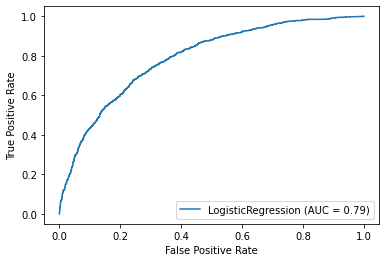

In [196]:
plot_roc_curve(LR , xtrain , ytrain)

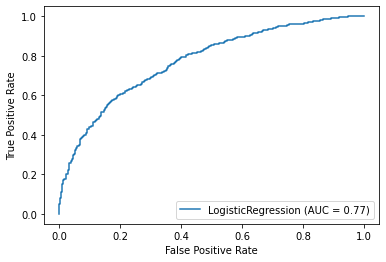

In [197]:
plot_roc_curve(LR , xtest , ytest)

In [198]:
print(classification_report(ytrain , ypred_train))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1520
           1       0.70      0.66      0.68      1278

    accuracy                           0.72      2798
   macro avg       0.71      0.71      0.71      2798
weighted avg       0.72      0.72      0.72      2798



In [199]:
print(classification_report(ytest , ypred_test))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72       636
           1       0.69      0.65      0.67       564

    accuracy                           0.70      1200
   macro avg       0.70      0.70      0.70      1200
weighted avg       0.70      0.70      0.70      1200



In [200]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(LR , f_test,y , cv=kf , scoring='roc_auc')
bias_lr = np.mean(1-score)
variance_lr = np.std(score , ddof=1)
print(round(bias_lr,4) , variance_lr)



0.2198 0.018436144836848595


# KNN Base Model ALL Features **

In [201]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

In [202]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [203]:
ypred_train_knn1 = KNN.predict(xtrain)
ypred_test_knn1 = KNN.predict(xtest)

In [204]:
print(accuracy_score(ytrain, ypred_train_knn1))

0.7869907076483202


In [205]:
print(accuracy_score(ytest, ypred_test_knn1))

0.6633333333333333


In [206]:
print(classification_report(ytrain , ypred_train_knn1))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1520
           1       0.77      0.76      0.76      1278

    accuracy                           0.79      2798
   macro avg       0.79      0.78      0.78      2798
weighted avg       0.79      0.79      0.79      2798



In [207]:
print(classification_report(ytest , ypred_test_knn1))

              precision    recall  f1-score   support

           0       0.68      0.69      0.68       636
           1       0.64      0.64      0.64       564

    accuracy                           0.66      1200
   macro avg       0.66      0.66      0.66      1200
weighted avg       0.66      0.66      0.66      1200



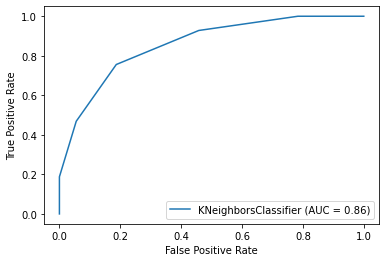

In [208]:
plot_roc_curve(KNN, xtrain , ytrain)

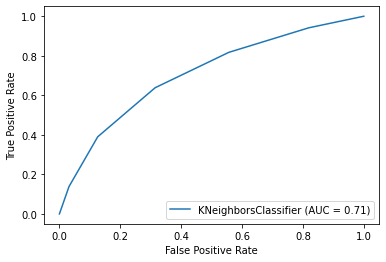

In [209]:
plot_roc_curve(KNN, xtest , ytest)

In [210]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN , f_all, y , cv=kf , scoring='roc_auc')
bias_knn1 = np.mean(1-score)
variance_knn1 = np.std(score , ddof=1)
print(bias_knn1 , variance_knn1)

0.297130637607461 0.017627486713994313


In [211]:
#tune knn model
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(1,100) , 'weights':['uniform','distance']}
GS = GridSearchCV(KNN , params ,cv=10 , scoring='roc_auc')
GS.fit(f_all , y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [212]:
GS.best_params_
#redefining model and running the steps again

{'n_neighbors': 92, 'weights': 'distance'}

In [213]:
KNN_tuned = KNeighborsClassifier(n_neighbors=92 , weights='distance')

In [214]:
KNN_tuned.fit(xtrain , ytrain)

KNeighborsClassifier(n_neighbors=92, weights='distance')

In [215]:
ypred_knn_train_tuned = KNN_tuned.predict(xtrain)
ypred_knn_test_tuned = KNN_tuned.predict(xtest)

In [216]:
print(accuracy_score(ytrain ,ypred_knn_train_tuned ))
print(accuracy_score(ytest ,ypred_knn_test_tuned ))

1.0
0.6958333333333333


In [217]:
print(classification_report(ytrain ,ypred_knn_train_tuned ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1520
           1       1.00      1.00      1.00      1278

    accuracy                           1.00      2798
   macro avg       1.00      1.00      1.00      2798
weighted avg       1.00      1.00      1.00      2798



In [218]:
print(classification_report(ytest ,ypred_knn_test_tuned ))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       636
           1       0.68      0.66      0.67       564

    accuracy                           0.70      1200
   macro avg       0.69      0.69      0.69      1200
weighted avg       0.70      0.70      0.70      1200



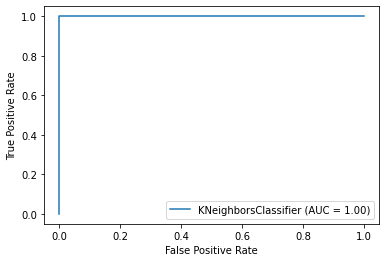

In [219]:
plot_roc_curve(KNN_tuned , xtrain , ytrain)

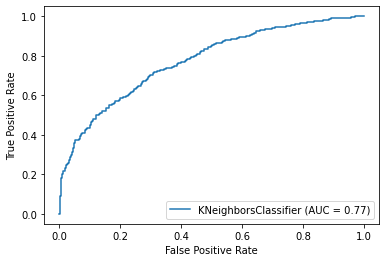

In [220]:
plot_roc_curve(KNN_tuned , xtest , ytest)

In [221]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN_tuned , f_all, y , cv=kf , scoring='roc_auc')
bias_knn_tuned = np.mean(1-score)
variance_knn_tuned = np.std(score , ddof=1)
print(bias_knn_tuned , variance_knn_tuned)

0.22280667029131146 0.013998653753165438


# Naive Bayes Base Model Selected Features **

In [222]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_test , y , test_size=0.3 , random_state=0 )

In [223]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(xtrain , ytrain)

GaussianNB()

In [224]:
ypred_train_gb2 = NB.predict(xtrain)
ypred_test_gb2 = NB.predict(xtest)

In [225]:
print(accuracy_score(ytrain , ypred_train_gb2))
print(accuracy_score(ytest , ypred_test_gb2))

0.68084345961401
0.6775


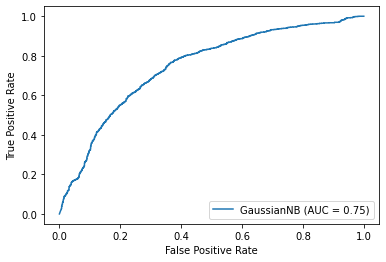

In [226]:
plot_roc_curve(NB , xtrain , ytrain)

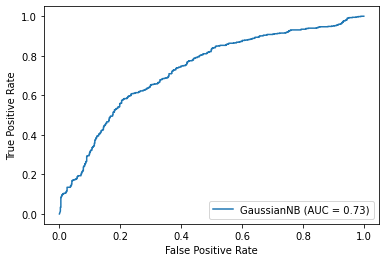

In [227]:
plot_roc_curve(NB , xtest , ytest)

In [228]:
print(classification_report(ytrain , ypred_train_gb2))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1520
           1       0.71      0.51      0.59      1278

    accuracy                           0.68      2798
   macro avg       0.69      0.67      0.67      2798
weighted avg       0.69      0.68      0.67      2798



In [229]:
print(classification_report(ytest , ypred_test_gb2))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73       636
           1       0.72      0.51      0.60       564

    accuracy                           0.68      1200
   macro avg       0.69      0.67      0.66      1200
weighted avg       0.69      0.68      0.67      1200



In [230]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(NB , f_test, y , cv=kf , scoring='roc_auc')
bias_nb2 = np.mean(1-score)
variance_nb2 = np.std(score , ddof=1)
print(bias_nb2 , variance_nb2)

0.26031533831282283 0.022262904808383315


# Decision Tree Base Model ALL FEATURES **

In [231]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

In [232]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(xtrain , ytrain)

DecisionTreeClassifier(random_state=0)

In [233]:
ypred_train_dt1 = DT.predict(xtrain)
ypred_test_dt1 = DT.predict(xtest)

In [234]:
print(accuracy_score(ytrain , ypred_train_dt1))
print(accuracy_score(ytest , ypred_test_dt1))

1.0
0.6116666666666667


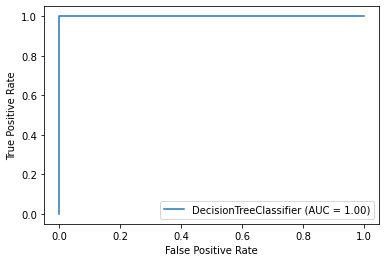

In [235]:
plot_roc_curve(DT , xtrain , ytrain)

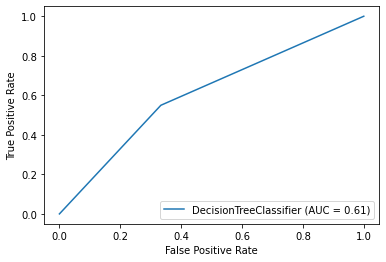

In [236]:
plot_roc_curve(DT , xtest , ytest)

In [237]:
print(classification_report(ytrain , ypred_train_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1520
           1       1.00      1.00      1.00      1278

    accuracy                           1.00      2798
   macro avg       1.00      1.00      1.00      2798
weighted avg       1.00      1.00      1.00      2798



In [238]:
print(classification_report(ytest , ypred_test_dt1))

              precision    recall  f1-score   support

           0       0.63      0.67      0.65       636
           1       0.59      0.55      0.57       564

    accuracy                           0.61      1200
   macro avg       0.61      0.61      0.61      1200
weighted avg       0.61      0.61      0.61      1200



In [239]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(DT , f_all, y , cv=kf , scoring='roc_auc')
bias_dt1 = np.mean(1-score)
variance_dt1 = np.std(score , ddof=1)
print(bias_dt1 , variance_dt1)

0.3875028630715817 0.011383174344772984


In [240]:
#Tuning a decision tree

In [241]:
params = {'criterion':['gini','entropy'],'max_depth':np.arange(1,100)}
Grid = GridSearchCV(DT , params , cv=10 , scoring='roc_auc')
Grid.fit(f_all,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='roc_auc')

In [242]:
Grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [243]:
#redefine model

In [244]:
DT_reg = DecisionTreeClassifier(max_depth=4 , criterion='gini' , random_state=0)

In [245]:
DT_reg.fit(xtrain , ytrain)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [246]:
ypred_train_dt_tuned = DT_reg.predict(xtrain)
ypred_test_dt_tuned = DT_reg.predict(xtest)

In [247]:
print(accuracy_score(ytrain,ypred_train_dt_tuned)*100)
print(accuracy_score(ytest,ypred_test_dt_tuned)*100)
#testing accuracy has increased by 7 percent

71.4796283059328
66.08333333333334


In [248]:
print(classification_report(ytrain,ypred_train_dt_tuned))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1520
           1       0.70      0.66      0.68      1278

    accuracy                           0.71      2798
   macro avg       0.71      0.71      0.71      2798
weighted avg       0.71      0.71      0.71      2798



In [249]:
print(classification_report(ytest,ypred_test_dt_tuned))

              precision    recall  f1-score   support

           0       0.67      0.70      0.69       636
           1       0.65      0.62      0.63       564

    accuracy                           0.66      1200
   macro avg       0.66      0.66      0.66      1200
weighted avg       0.66      0.66      0.66      1200



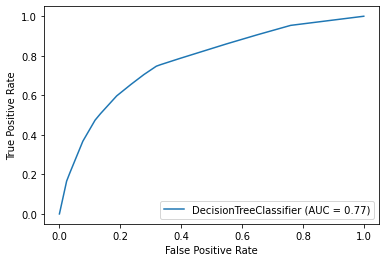

In [250]:
plot_roc_curve(DT_reg , xtrain , ytrain)

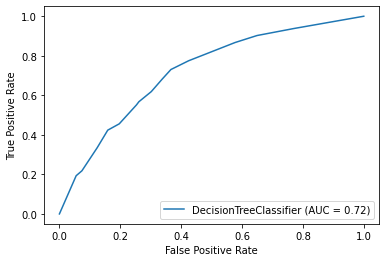

In [251]:
plot_roc_curve(DT_reg , xtest , ytest)

In [252]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(DT_reg , f_all, y , cv=kf , scoring='roc_auc')
bias_dt_tuned1 = np.mean(1-score)
variance_dt_tuned1 = np.std(score , ddof=1)
print(bias_dt_tuned1 , variance_dt_tuned1)

0.2744580926325497 0.00843869208059502


# Random Forest Base Model

In [253]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

In [254]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [255]:
ypred_train_rf1 = RF.predict(xtrain)
ypred_test_rf1 = RF.predict(xtest)

In [256]:
print(accuracy_score( ytrain, ypred_train_rf1))

1.0


In [257]:
print(accuracy_score(ytest , ypred_test_rf1))

0.6941666666666667


In [258]:
print(classification_report(ytrain , ypred_train_rf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1520
           1       1.00      1.00      1.00      1278

    accuracy                           1.00      2798
   macro avg       1.00      1.00      1.00      2798
weighted avg       1.00      1.00      1.00      2798



In [259]:
print(classification_report(ytest , ypred_test_rf1))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       636
           1       0.68      0.65      0.67       564

    accuracy                           0.69      1200
   macro avg       0.69      0.69      0.69      1200
weighted avg       0.69      0.69      0.69      1200



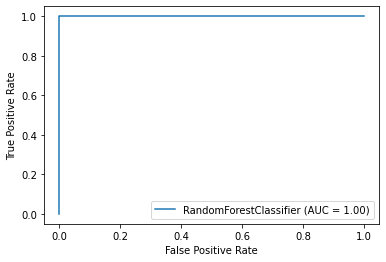

In [260]:
plot_roc_curve(RF , xtrain , ytrain)

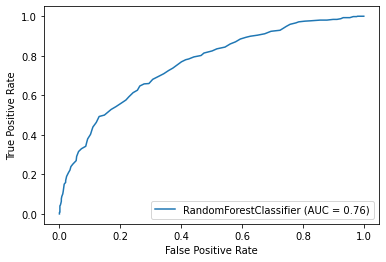

In [261]:
plot_roc_curve(RF , xtest , ytest)

In [262]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(RF , f_all, y , cv=kf , scoring='roc_auc')
bias_rf1 = np.mean(1-score)
variance_rf1 = np.std(score , ddof=1)
print(bias_rf1 , variance_rf1)

0.2275795486126942 0.018812064165026888


In [263]:
#Tune Random Forest 

In [264]:
rf_be=[]
rf_ve=[]
for i in np.arange(1,100):
    RF = RandomForestClassifier(n_estimators=i ,max_depth=4 ,  criterion='entropy',random_state=0)
    score = cross_val_score(RF , f_all , y , cv=kf , scoring='roc_auc')
    rf_be.append(np.mean(1-score))
    rf_ve.append(np.std(score,ddof=1))

In [265]:
np.min(rf_be) , np.argmin(rf_be) , rf_ve[78]

(0.2271155084713099, 78, 0.015972472386457784)

In [266]:
rf_be=[]
rf_ve=[]
for i in np.arange(1,100):
    RF = RandomForestClassifier(n_estimators=i ,max_depth=4, criterion='gini',random_state=0)
    score = cross_val_score(RF , f_all , y , cv=kf , scoring='roc_auc')
    rf_be.append(np.mean(1-score))
    rf_ve.append(np.std(score,ddof=1))

In [267]:
np.min(rf_be) , np.argmin(rf_be) , rf_ve[78]

(0.22731727195975093, 78, 0.016399395297683292)

In [268]:
#REDEFine model with n-estimators = 79

In [269]:
RF_tuned = RandomForestClassifier(n_estimators = 79 , max_depth=4 , criterion='entropy')

In [270]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

In [271]:
RF_tuned.fit(xtrain , ytrain)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=79)

In [272]:
ypred_train_rf2 = RF_tuned.predict(xtrain)
ypred_test_rf2 = RF_tuned.predict(xtest)

In [273]:
print(accuracy_score(ytrain ,ypred_train_rf2 ))
print(accuracy_score(ytest ,ypred_test_rf2 ))

0.7373123659756969
0.6833333333333333


In [274]:
print(classification_report(ytrain ,ypred_train_rf2 ))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77      1520
           1       0.76      0.63      0.68      1278

    accuracy                           0.74      2798
   macro avg       0.74      0.73      0.73      2798
weighted avg       0.74      0.74      0.73      2798



In [275]:
print(classification_report(ytest ,ypred_test_rf2 ))

              precision    recall  f1-score   support

           0       0.68      0.76      0.72       636
           1       0.69      0.59      0.64       564

    accuracy                           0.68      1200
   macro avg       0.68      0.68      0.68      1200
weighted avg       0.68      0.68      0.68      1200



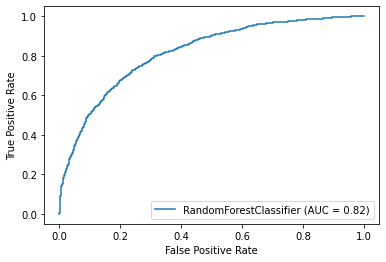

In [276]:
plot_roc_curve(RF_tuned , xtrain , ytrain)

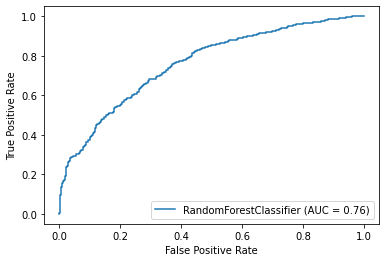

In [277]:
plot_roc_curve(RF_tuned , xtest , ytest)

In [278]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(RF_tuned , f_all, y , cv=kf , scoring='roc_auc')
bias_rf2 = np.mean(1-score)
variance_rf2 = np.std(score , ddof=1)
print(bias_rf2 , variance_rf2)

0.2293975125030539 0.017007033620501412


In [279]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN_tuned))
models.append(('DecisionTree',DT_reg))
models.append(('RandomForest',RF_tuned))


Logistic: 0.219098 (0.019298)
NaiveBayes: 0.272175 (0.023834)
KNN: 0.222807 (0.013999)
DecisionTree: 0.274458 (0.008439)
RandomForest: 0.230305 (0.017032)


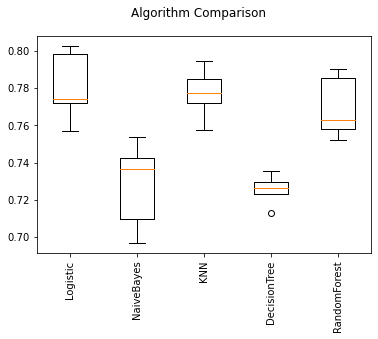

In [280]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, f_all, y,cv=kf, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# All Base Models have been applied . Now we will change the threshold for Salary and apply Oversampling and Smote Techniques  

In [498]:
sal_class = []

for i in df2['Salary']:
    if i > 600000:
        sal_class.append(1)
    else:
        sal_class.append(0)
        

In [499]:
y = pd.Series(sal_class , name='Salary_Class')
y.value_counts(normalize=True)*100

0    96.098049
1     3.901951
Name: Salary_Class, dtype: float64

# Running Base Models with new threshold

In [500]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve , precision_score , confusion_matrix , classification_report , accuracy_score
xtrain , xtest , ytrain , ytest = train_test_split(f_test , y , test_size=0.3 , random_state=0 )

In [501]:
LR = LogisticRegression()
LR.fit(xtrain , ytrain)

ypred_train = LR.predict(xtrain)
ypred_test = LR.predict(xtest)

In [502]:
print(accuracy_score(ytrain , ypred_train)*100)
print(accuracy_score(ytest , ypred_test)*100)

96.1758398856326
95.33333333333334


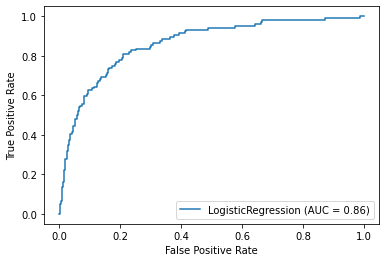

In [503]:
plot_roc_curve(LR , xtrain , ytrain)

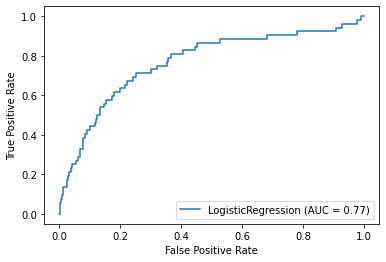

In [504]:
plot_roc_curve(LR , xtest , ytest)

In [505]:
print(classification_report(ytrain , ypred_train))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2694
           1       0.33      0.03      0.05       104

    accuracy                           0.96      2798
   macro avg       0.65      0.51      0.52      2798
weighted avg       0.94      0.96      0.95      2798



In [506]:
print(classification_report(ytest , ypred_test))
#As we can see very low recall ,our model is a useless model as it is not able to classify the 
#minority class properly

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1148
           1       0.33      0.08      0.12        52

    accuracy                           0.95      1200
   macro avg       0.65      0.53      0.55      1200
weighted avg       0.93      0.95      0.94      1200



In [507]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(LR , f_test,y , cv=kf , scoring='roc_auc')
bias_lr = np.mean(1-score)
variance_lr = np.std(score , ddof=1)
print(round(bias_lr,4) , variance_lr)



0.1876 0.05833294560226836


# KNN Base Model ALL Features **

In [508]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

In [509]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [510]:
ypred_train_knn1 = KNN.predict(xtrain)
ypred_test_knn1 = KNN.predict(xtest)

In [511]:
print(accuracy_score(ytrain, ypred_train_knn1))

0.9624731951393852


In [512]:
print(accuracy_score(ytest, ypred_test_knn1))

0.9558333333333333


In [513]:
print(classification_report(ytrain , ypred_train_knn1))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2694
           1       0.45      0.05      0.09       104

    accuracy                           0.96      2798
   macro avg       0.71      0.52      0.53      2798
weighted avg       0.95      0.96      0.95      2798



In [515]:
print(classification_report(ytest , ypred_test_knn1))
#precision has improved but recall is still low

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1148
           1       0.40      0.04      0.07        52

    accuracy                           0.96      1200
   macro avg       0.68      0.52      0.52      1200
weighted avg       0.93      0.96      0.94      1200



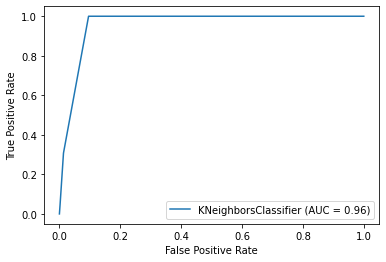

In [516]:
plot_roc_curve(KNN, xtrain , ytrain)

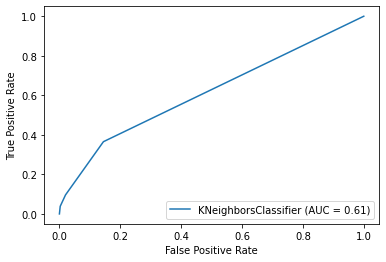

In [517]:
plot_roc_curve(KNN, xtest , ytest)

In [518]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN , f_all, y , cv=kf , scoring='roc_auc')
bias_knn1 = np.mean(1-score)
variance_knn1 = np.std(score , ddof=1)
print(bias_knn1 , variance_knn1)

0.39537499790537683 0.05113769648227973


In [519]:
#tune knn model
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(1,100) , 'weights':['uniform','distance']}
GS = GridSearchCV(KNN , params ,cv=10 , scoring='roc_auc')
GS.fit(f_all , y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [520]:
GS.best_params_
#redefining model and running the steps again

{'n_neighbors': 99, 'weights': 'distance'}

In [521]:
KNN_tuned = KNeighborsClassifier(n_neighbors=99 , weights='distance')

In [522]:
KNN_tuned.fit(xtrain , ytrain)

KNeighborsClassifier(n_neighbors=99, weights='distance')

In [523]:
ypred_knn_train_tuned = KNN_tuned.predict(xtrain)
ypred_knn_test_tuned = KNN_tuned.predict(xtest)

In [524]:
print(accuracy_score(ytrain ,ypred_knn_train_tuned ))
print(accuracy_score(ytest ,ypred_knn_test_tuned ))

1.0
0.9566666666666667


In [525]:
print(classification_report(ytrain ,ypred_knn_train_tuned ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00       104

    accuracy                           1.00      2798
   macro avg       1.00      1.00      1.00      2798
weighted avg       1.00      1.00      1.00      2798



In [526]:
print(classification_report(ytest ,ypred_knn_test_tuned ))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1148
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1200
   macro avg       0.48      0.50      0.49      1200
weighted avg       0.92      0.96      0.94      1200



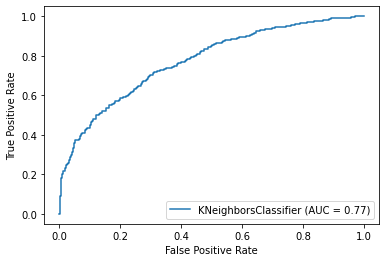

In [220]:
plot_roc_curve(KNN_tuned , xtest , ytest)

# Naive Bayes Base Model Selected Features **

In [527]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_test , y , test_size=0.3 , random_state=0 )

In [528]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(xtrain , ytrain)

GaussianNB()

In [529]:
ypred_train_gb2 = NB.predict(xtrain)
ypred_test_gb2 = NB.predict(xtest)

In [530]:
print(accuracy_score(ytrain , ypred_train_gb2))
print(accuracy_score(ytest , ypred_test_gb2))

0.8899213724088635
0.8708333333333333


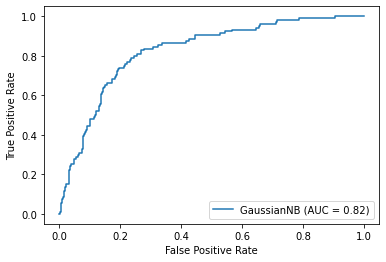

In [531]:
plot_roc_curve(NB , xtrain , ytrain)

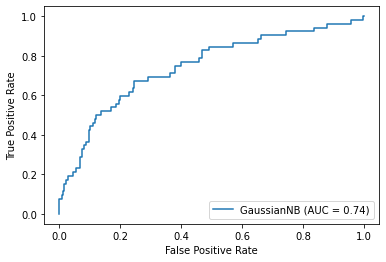

In [532]:
plot_roc_curve(NB , xtest , ytest)

In [533]:
print(classification_report(ytrain , ypred_train_gb2))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2694
           1       0.16      0.44      0.23       104

    accuracy                           0.89      2798
   macro avg       0.57      0.67      0.59      2798
weighted avg       0.95      0.89      0.91      2798



In [535]:
print(classification_report(ytest , ypred_test_gb2))
#high recall but low precision

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1148
           1       0.16      0.46      0.24        52

    accuracy                           0.87      1200
   macro avg       0.57      0.68      0.58      1200
weighted avg       0.94      0.87      0.90      1200



In [536]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(NB , f_test, y , cv=kf , scoring='roc_auc')
bias_nb2 = np.mean(1-score)
variance_nb2 = np.std(score , ddof=1)
print(bias_nb2 , variance_nb2)

0.2217247295748007 0.05330145300404846


# Decision Tree Base Model ALL FEATURES **

In [537]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

In [538]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(xtrain , ytrain)

DecisionTreeClassifier(random_state=0)

In [539]:
ypred_train_dt1 = DT.predict(xtrain)
ypred_test_dt1 = DT.predict(xtest)

In [540]:
print(accuracy_score(ytrain , ypred_train_dt1))
print(accuracy_score(ytest , ypred_test_dt1))

1.0
0.9166666666666666


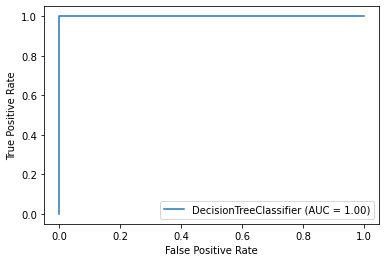

In [541]:
plot_roc_curve(DT , xtrain , ytrain)

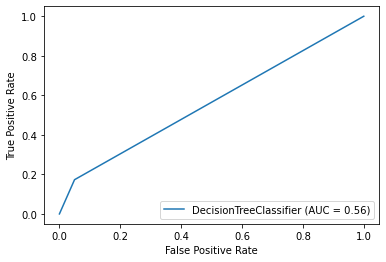

In [542]:
plot_roc_curve(DT , xtest , ytest)

In [543]:
print(classification_report(ytrain , ypred_train_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00       104

    accuracy                           1.00      2798
   macro avg       1.00      1.00      1.00      2798
weighted avg       1.00      1.00      1.00      2798



In [545]:
print(classification_report(ytest , ypred_test_dt1))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1148
           1       0.14      0.17      0.15        52

    accuracy                           0.92      1200
   macro avg       0.55      0.56      0.55      1200
weighted avg       0.93      0.92      0.92      1200



In [546]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(DT , f_all, y , cv=kf , scoring='roc_auc')
bias_dt1 = np.mean(1-score)
variance_dt1 = np.std(score , ddof=1)
print(bias_dt1 , variance_dt1)

0.4516940449255456 0.026404490131274543


In [240]:
#Tuning a decision tree

In [547]:
params = {'criterion':['gini','entropy'],'max_depth':np.arange(1,100)}
Grid = GridSearchCV(DT , params , cv=10 , scoring='roc_auc')
Grid.fit(f_all,y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='roc_auc')

In [548]:
Grid.best_params_

{'criterion': 'entropy', 'max_depth': 2}

In [243]:
#redefine model

In [549]:
DT_reg = DecisionTreeClassifier(max_depth=2 , criterion='entropy' , random_state=0)

In [550]:
DT_reg.fit(xtrain , ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [551]:
ypred_train_dt_tuned = DT_reg.predict(xtrain)
ypred_test_dt_tuned = DT_reg.predict(xtest)

In [552]:
print(accuracy_score(ytrain,ypred_train_dt_tuned)*100)
print(accuracy_score(ytest,ypred_test_dt_tuned)*100)
#testing accuracy has increased by 7 percent

96.2830593280915
95.66666666666667


In [553]:
print(classification_report(ytrain,ypred_train_dt_tuned))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2694
           1       0.00      0.00      0.00       104

    accuracy                           0.96      2798
   macro avg       0.48      0.50      0.49      2798
weighted avg       0.93      0.96      0.94      2798



In [554]:
print(classification_report(ytest,ypred_test_dt_tuned))
# zero precision and recall for minority class

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1148
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1200
   macro avg       0.48      0.50      0.49      1200
weighted avg       0.92      0.96      0.94      1200



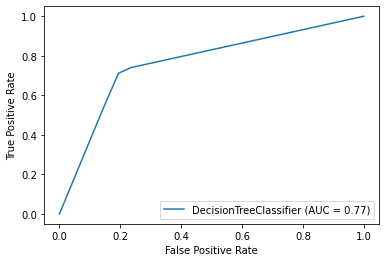

In [555]:
plot_roc_curve(DT_reg , xtrain , ytrain)


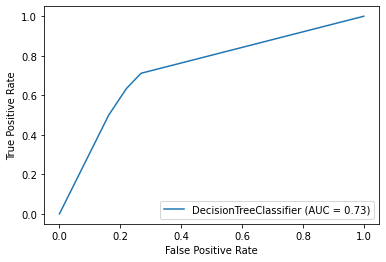

In [556]:
plot_roc_curve(DT_reg , xtest , ytest)

In [557]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(DT_reg , f_all, y , cv=kf , scoring='roc_auc')
bias_dt_tuned1 = np.mean(1-score)
variance_dt_tuned1 = np.std(score , ddof=1)
print(bias_dt_tuned1 , variance_dt_tuned1)

0.2739097467181755 0.04522221572569029


# Random Forest Base Model

In [558]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(f_all , y , test_size=0.3 , random_state=0 )

In [559]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0)
RF.fit(xtrain,ytrain)

RandomForestClassifier(random_state=0)

In [560]:
ypred_train_rf1 = RF.predict(xtrain)
ypred_test_rf1 = RF.predict(xtest)

In [561]:
print(accuracy_score( ytrain, ypred_train_rf1))

1.0


In [562]:
print(accuracy_score(ytest , ypred_test_rf1))

0.9566666666666667


In [563]:
print(classification_report(ytrain , ypred_train_rf1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00       104

    accuracy                           1.00      2798
   macro avg       1.00      1.00      1.00      2798
weighted avg       1.00      1.00      1.00      2798



In [565]:
print(classification_report(ytest , ypred_test_rf1))
#zero precision and recall

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1148
           1       0.00      0.00      0.00        52

    accuracy                           0.96      1200
   macro avg       0.48      0.50      0.49      1200
weighted avg       0.92      0.96      0.94      1200



In [566]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN_tuned))
models.append(('DecisionTree',DT_reg))
models.append(('RandomForest',RF_tuned))


Logistic: 0.189711 (0.056823)
NaiveBayes: 0.241516 (0.058927)
KNN: 0.204381 (0.041964)
DecisionTree: 0.273910 (0.045222)
RandomForest: 0.227447 (0.062819)


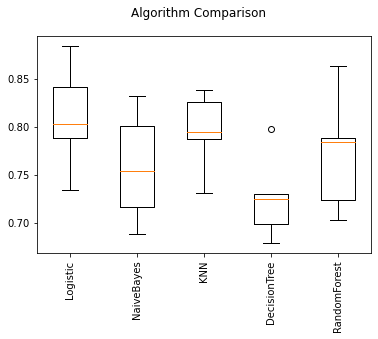

In [567]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, f_all, y,cv=kf, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

# The precision and recall for minority class falls below the acceptance range
# for all the models . We will have to treat the imbalanced data and run our models again
#

# Oversampling of minority class after changing the threshold

In [570]:
sal_class = []

for i in df2['Salary']:
    if i > 600000:
        sal_class.append(1)
    else:
        sal_class.append(0)

In [571]:
y = pd.Series(sal_class , name='Salary_Class')
y.value_counts(normalize=True)*100

0    96.098049
1     3.901951
Name: Salary_Class, dtype: float64

In [283]:
data = pd.concat((f_all,y),1)

In [284]:
class_0 = data[data['Salary_Class']==0]
class_1 = data[data['Salary_Class']==1]

In [285]:
#We will not apply undersampling as we do not want to lose any valuable data
#we will apply oversampling and smote

In [286]:
class_count_0 , class_count_1 = data['Salary_Class'].value_counts()
data['Salary_Class'].value_counts()

0    3842
1     156
Name: Salary_Class, dtype: int64

In [287]:
class_1_over = class_1.sample(class_count_0 , replace=True)
test_over = pd.concat((class_0 , class_1_over) , axis=0)


test_over = test_over.sample(frac=1)

In [288]:
selected = list(f_test.columns)
print(selected)

['Gender_F', 'Gender_M', '10board_CBSE', '10board_ICSE', '10board_State Board', '12board_CBSE', '12board_ISC', '12board_State Board', 'CollegeTier_1.0', 'CollegeTier_2.0', 'Degree_B.Tech/B.E.', 'Degree_MCA', 'Specialization_civil engineering', 'CollegeCityTier_0.0', 'CollegeCityTier_1.0', '10percentage', '12graduation', '12percentage', 'collegeGPA', 'GraduationYear', 'English', 'Logical', 'Quant', 'Number_Of_Optional_Subjects', 'Optional_Marks', 'Age', 'Domain', 'conscientiousness', 'agreeableness', 'nueroticism']


In [289]:
x2 = test_over.drop('Salary_Class',1)
y2 = test_over['Salary_Class']

In [290]:
test_over.columns

Index(['Gender_F', 'Gender_M', '10board_CBSE', '10board_ICSE',
       '10board_State Board', '12board_CBSE', '12board_ISC',
       '12board_State Board', 'CollegeTier_1.0', 'CollegeTier_2.0',
       'Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.',
       'Degree_MCA', 'Specialization_civil engineering',
       'Specialization_computer science & engineering',
       'Specialization_electronics engineering',
       'Specialization_mechanical engineering',
       'Specialization_medical engineering', 'Specialization_other',
       'CollegeCityTier_0.0', 'CollegeCityTier_1.0', '10percentage',
       '12graduation', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Number_Of_Optional_Subjects',
       'Optional_Marks', 'Age', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Salary_Class'],
      dtype='object')

In [291]:
print(x2.shape , y2.shape)

(7684, 39) (7684,)


# Logistic Regression with Selective Features after Over Sampling

In [292]:
xtrain , xtest , ytrain , ytest = train_test_split( x2[selected] , y2 , test_size=0.3 , random_state=0)

In [293]:
LR = LogisticRegression()
LR.fit(xtrain , ytrain)

ypred_train_LR = LR.predict(xtrain)
ypred_test_LR = LR.predict(xtest)

In [294]:
accuracy_score(ytrain , ypred_train_LR)

0.7655262179248792

In [295]:
accuracy_score(ytest , ypred_test_LR)

0.777103209019948

In [296]:
print(classification_report(ytrain , ypred_train_LR))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2694
           1       0.77      0.76      0.76      2684

    accuracy                           0.77      5378
   macro avg       0.77      0.77      0.77      5378
weighted avg       0.77      0.77      0.77      5378



In [297]:
print(classification_report(ytest , ypred_test_LR))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1148
           1       0.78      0.77      0.78      1158

    accuracy                           0.78      2306
   macro avg       0.78      0.78      0.78      2306
weighted avg       0.78      0.78      0.78      2306



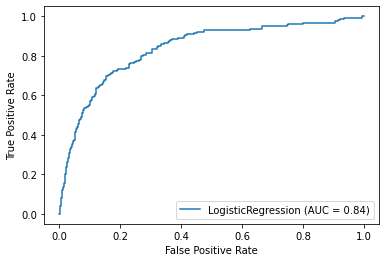

In [298]:
plot_roc_curve(LR , xtrain , ytrain)

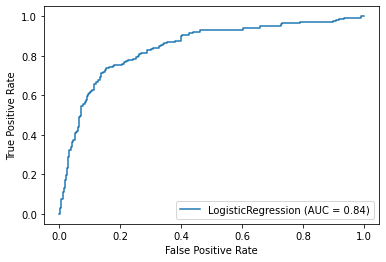

In [299]:
plot_roc_curve(LR , xtest , ytest)

In [300]:
#Accuracy has increased to 77 percent , recall has also improved

In [301]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(LR , x2[selected],y2 , cv=kf , scoring='roc_auc')
bias_lr = np.mean(1-score)
variance_lr = np.std(score , ddof=1)
print(round(bias_lr,4) , variance_lr)

#Low bias and variance in terms of roc_auc

0.1634 0.00906522849937418


# KNN after Oversampling with ALL Features

In [302]:
xtrain , xtest , ytrain , ytest = train_test_split( x2 , y2 , test_size=0.3 , random_state=0)

In [303]:
KNN = KNeighborsClassifier()
KNN.fit(xtrain , ytrain)

KNeighborsClassifier()

In [304]:
ypred_train_knn = KNN.predict(xtrain)
ypred_test_knn = KNN.predict(xtest)

In [305]:
print(accuracy_score(ytrain, ypred_train_knn))

0.9616957976943101


In [306]:
print(accuracy_score(ytest, ypred_test_knn))

0.9449262792714658


In [307]:
print(classification_report(ytrain , ypred_train_knn))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2694
           1       0.93      1.00      0.96      2684

    accuracy                           0.96      5378
   macro avg       0.96      0.96      0.96      5378
weighted avg       0.96      0.96      0.96      5378



In [308]:
print(classification_report(ytest , ypred_test_knn))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      1148
           1       0.90      1.00      0.95      1158

    accuracy                           0.94      2306
   macro avg       0.95      0.94      0.94      2306
weighted avg       0.95      0.94      0.94      2306



In [309]:
confusion_matrix(ytrain , ypred_train_knn)

array([[2488,  206],
       [   0, 2684]])

In [310]:
confusion_matrix(ytest , ypred_test_knn)

array([[1021,  127],
       [   0, 1158]])

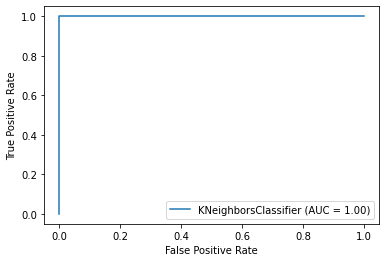

In [311]:
plot_roc_curve(KNN, xtrain , ytrain)

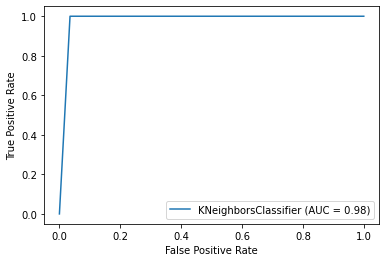

In [312]:
plot_roc_curve(KNN, xtest , ytest)

In [313]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN , x2, y2 , cv=kf , scoring='roc_auc')
bias_knn1 = np.mean(1-score)
variance_knn1 = np.std(score , ddof=1)
print(bias_knn1 , variance_knn1)

#Lowest variance 

0.018737094738726423 0.003550760727588652


In [314]:
#tune knn model
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(1,100) , 'weights':['uniform','distance']}
GS = GridSearchCV(KNN , params ,cv=10 , scoring='roc_auc')
GS.fit(x2 , y2)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [315]:
GS.best_params_
#redefining model and running the steps again

{'n_neighbors': 81, 'weights': 'distance'}

In [316]:
KNN_tuned = KNeighborsClassifier(n_neighbors=86 , weights='distance' )
KNN_tuned.fit(xtrain , ytrain)


KNeighborsClassifier(n_neighbors=86, weights='distance')

In [317]:
ypred_train_knn = KNN_tuned.predict(xtrain)
ypred_test_knn = KNN_tuned.predict(xtest)

In [318]:
print(accuracy_score(ytrain, ypred_train_knn))

1.0


In [319]:
print(accuracy_score(ytest, ypred_test_knn))

0.8712055507372073


In [320]:
print(classification_report(ytrain , ypred_train_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2684

    accuracy                           1.00      5378
   macro avg       1.00      1.00      1.00      5378
weighted avg       1.00      1.00      1.00      5378



In [321]:
print(classification_report(ytest , ypred_test_knn))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85      1148
           1       0.80      1.00      0.89      1158

    accuracy                           0.87      2306
   macro avg       0.90      0.87      0.87      2306
weighted avg       0.90      0.87      0.87      2306



In [322]:
confusion_matrix(ytrain , ypred_train_knn)

array([[2694,    0],
       [   0, 2684]])

In [323]:
confusion_matrix(ytest , ypred_test_knn)

array([[ 851,  297],
       [   0, 1158]])

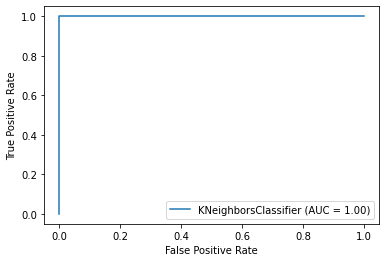

In [324]:
plot_roc_curve(KNN_tuned, xtrain , ytrain)

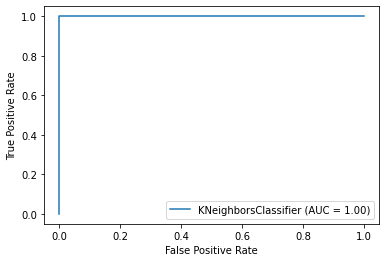

In [325]:
plot_roc_curve(KNN_tuned, xtest , ytest)

In [326]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN_tuned , x2, y2 , cv=kf , scoring='roc_auc')
bias_knn1 = np.mean(1-score)
variance_knn1 = np.std(score , ddof=1)
print(bias_knn1 , variance_knn1)

#Model can be highly biased

0.0001225490196078427 0.0002740279384190909


In [327]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN_tuned , x2, y2 , cv=kf , scoring='precision')
bias_knn1 = np.mean(1-score)
variance_knn1 = np.std(score , ddof=1)
print(bias_knn1 , variance_knn1)

#Lowest variance 

0.2088128335236333 0.029433357825572378


In [328]:
#Let us try weights as uniform with metric as manhattan

In [329]:
KNN_tuned = KNeighborsClassifier(n_neighbors=86 , weights='uniform' , metric = 'manhattan' )
KNN_tuned.fit(xtrain , ytrain)


KNeighborsClassifier(metric='manhattan', n_neighbors=86)

In [330]:
ypred_train_knn = KNN_tuned.predict(xtrain)
ypred_test_knn = KNN_tuned.predict(xtest)

In [331]:
print(accuracy_score(ytrain, ypred_train_knn))

0.7742655262179249


In [332]:
print(accuracy_score(ytest, ypred_test_knn))

0.7732003469210754


In [333]:
print(classification_report(ytrain , ypred_train_knn))

              precision    recall  f1-score   support

           0       0.79      0.74      0.77      2694
           1       0.76      0.81      0.78      2684

    accuracy                           0.77      5378
   macro avg       0.78      0.77      0.77      5378
weighted avg       0.78      0.77      0.77      5378



In [334]:
print(classification_report(ytest , ypred_test_knn))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77      1148
           1       0.76      0.80      0.78      1158

    accuracy                           0.77      2306
   macro avg       0.77      0.77      0.77      2306
weighted avg       0.77      0.77      0.77      2306



In [335]:
confusion_matrix(ytrain , ypred_train_knn)

array([[1998,  696],
       [ 518, 2166]])

In [336]:
confusion_matrix(ytest , ypred_test_knn)

array([[862, 286],
       [237, 921]])

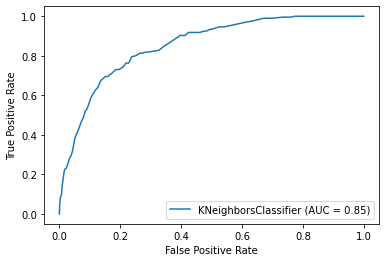

In [337]:
plot_roc_curve(KNN_tuned, xtrain , ytrain)

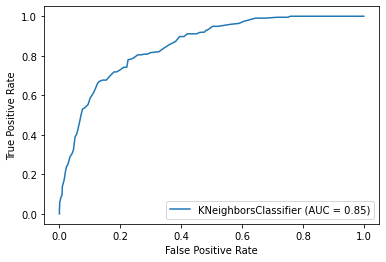

In [338]:
plot_roc_curve(KNN_tuned, xtest , ytest)

In [339]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN_tuned , x2, y2 , cv=kf , scoring='roc_auc')
bias_knn1 = np.mean(1-score)
variance_knn1 = np.std(score , ddof=1)
print(bias_knn1 , variance_knn1)

#Lowest variance 

0.14625545663721892 0.007271830971654711


In [340]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN_tuned , x2, y2 , cv=kf , scoring='precision')
bias_knn1 = np.mean(1-score)
variance_knn1 = np.std(score , ddof=1)
print(bias_knn1 , variance_knn1)

#Lowest variance 

0.24295883691927864 0.03293025872739983


# Naive Bayes Oversampling Model Selected Features **

In [341]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x2[selected] , y2 , test_size=0.3 , random_state=0 )

In [342]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(xtrain , ytrain)

GaussianNB()

In [343]:
ypred_train_gb2 = NB.predict(xtrain)
ypred_test_gb2 = NB.predict(xtest)

In [344]:
print(accuracy_score(ytrain , ypred_train_gb2))
print(accuracy_score(ytest , ypred_test_gb2))

0.7080699144663444
0.720294882914137


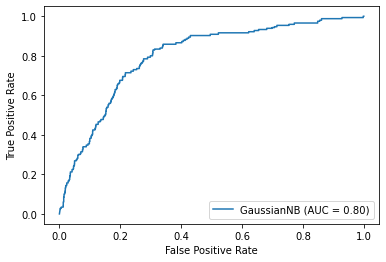

In [345]:
plot_roc_curve(NB , xtrain , ytrain)

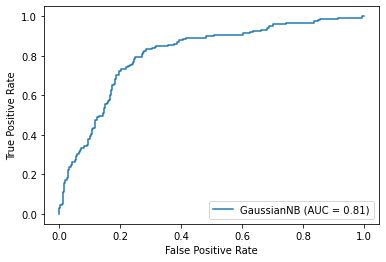

In [346]:
plot_roc_curve(NB , xtest , ytest)

In [347]:
print(classification_report(ytrain , ypred_train_gb2))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74      2694
           1       0.77      0.59      0.67      2684

    accuracy                           0.71      5378
   macro avg       0.72      0.71      0.70      5378
weighted avg       0.72      0.71      0.70      5378



In [348]:
print(classification_report(ytest , ypred_test_gb2))

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1148
           1       0.79      0.61      0.69      1158

    accuracy                           0.72      2306
   macro avg       0.73      0.72      0.72      2306
weighted avg       0.73      0.72      0.72      2306



In [349]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(NB , x2, y2 , cv=kf , scoring='roc_auc')
bias_nb2 = np.mean(1-score)
variance_nb2 = np.std(score , ddof=1)
print(bias_nb2 , variance_nb2)

0.21428183085540703 0.015198210529288806


# Decision Tree Oversampling - All Features

In [350]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x2 , y2 , test_size=0.3 , random_state=0 )

In [351]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(xtrain , ytrain)

DecisionTreeClassifier(random_state=0)

In [352]:
ypred_train_dt1 = DT.predict(xtrain)
ypred_test_dt1 = DT.predict(xtest)

In [353]:
print(accuracy_score(ytrain , ypred_train_dt1))
print(accuracy_score(ytest , ypred_test_dt1))

1.0
0.9774501300954033


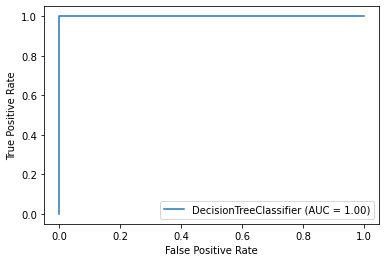

In [354]:
plot_roc_curve(DT , xtrain , ytrain)

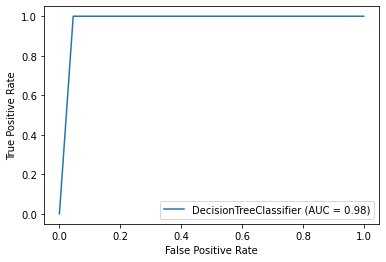

In [355]:
plot_roc_curve(DT , xtest , ytest)

In [356]:
print(classification_report(ytrain , ypred_train_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2684

    accuracy                           1.00      5378
   macro avg       1.00      1.00      1.00      5378
weighted avg       1.00      1.00      1.00      5378



In [357]:
print(classification_report(ytest , ypred_test_dt1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1148
           1       0.96      1.00      0.98      1158

    accuracy                           0.98      2306
   macro avg       0.98      0.98      0.98      2306
weighted avg       0.98      0.98      0.98      2306



In [358]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(DT , x2, y2, cv=kf , scoring='roc_auc')
bias_dt1 = np.mean(1-score)
variance_dt1 = np.std(score , ddof=1)
print(bias_dt1 , variance_dt1)

0.022970552128210885 0.005176568144262655


In [359]:
#Tuning a decision tree


In [360]:
params = {'criterion':['gini','entropy'],'max_depth':np.arange(1,100)}
Grid = GridSearchCV(DT , params , cv=10 , scoring='roc_auc')
Grid.fit(x2,y2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='roc_auc')

In [361]:
Grid.best_params_

{'criterion': 'gini', 'max_depth': 31}

In [362]:
#redefine model

In [363]:
DT_tuned = DecisionTreeClassifier(max_depth=31 , criterion='gini')

In [364]:
DT_tuned.fit(xtrain , ytrain)

DecisionTreeClassifier(max_depth=31)

In [365]:
ypred_train_dt_tuned = DT_tuned.predict(xtrain)
ypred_test_dt_tuned = DT_tuned.predict(xtest)

In [366]:
print(accuracy_score(ytrain,ypred_train_dt_tuned)*100)
print(accuracy_score(ytest,ypred_test_dt_tuned)*100)
#testing accuracy has increased by 7 percent

99.96281145407214
97.74501300954033


In [367]:
print(classification_report(ytrain,ypred_train_dt_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2684

    accuracy                           1.00      5378
   macro avg       1.00      1.00      1.00      5378
weighted avg       1.00      1.00      1.00      5378



In [368]:
print(classification_report(ytest,ypred_test_dt_tuned))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1148
           1       0.96      1.00      0.98      1158

    accuracy                           0.98      2306
   macro avg       0.98      0.98      0.98      2306
weighted avg       0.98      0.98      0.98      2306



In [369]:
print(confusion_matrix(ytrain,ypred_train_dt_tuned))

[[2692    2]
 [   0 2684]]


In [370]:
print(confusion_matrix(ytest,ypred_test_dt_tuned))

[[1096   52]
 [   0 1158]]


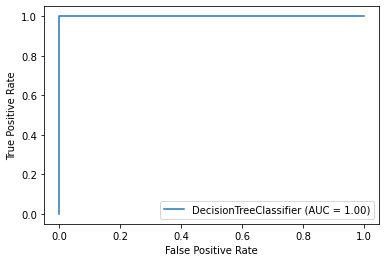

In [371]:
plot_roc_curve(DT , xtrain , ytrain)

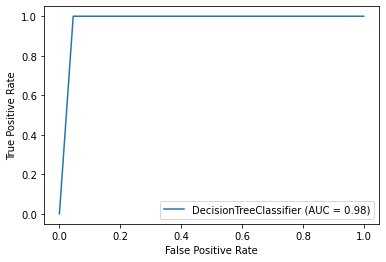

In [372]:
plot_roc_curve(DT , xtest , ytest)

In [373]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(DT_tuned , x2, y2 , cv=kf , scoring='roc_auc')
bias_dt_tuned1 = np.mean(1-score)
variance_dt_tuned1 = np.std(score , ddof=1)
print(bias_dt_tuned1 , variance_dt_tuned1)

0.021944525829213135 0.004708288730047198


# Random Forest - Oversampling , All Features

In [374]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x2 , y2 , test_size=0.3 , random_state=0 )

In [375]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=8 , criterion='gini',random_state=0)
RF.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=8, random_state=0)

In [376]:
ypred_train_rf1 = RF.predict(xtrain)
ypred_test_rf1 = RF.predict(xtest)

In [377]:
print(accuracy_score( ytrain, ypred_train_rf1))

0.965042766827817


In [378]:
print(accuracy_score(ytest , ypred_test_rf1))

0.9492627927146574


In [379]:
print(classification_report(ytrain , ypred_train_rf1))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2694
           1       0.95      0.99      0.97      2684

    accuracy                           0.97      5378
   macro avg       0.97      0.97      0.97      5378
weighted avg       0.97      0.97      0.97      5378



In [380]:
print(classification_report(ytest , ypred_test_rf1))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1148
           1       0.93      0.98      0.95      1158

    accuracy                           0.95      2306
   macro avg       0.95      0.95      0.95      2306
weighted avg       0.95      0.95      0.95      2306



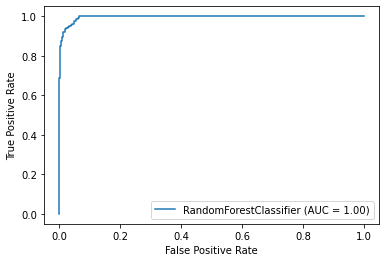

In [381]:
plot_roc_curve(RF , xtrain , ytrain)

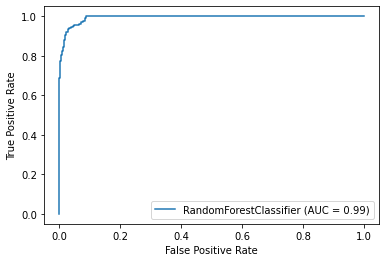

In [382]:
plot_roc_curve(RF , xtest , ytest)

In [383]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(RF , x2, y2 , cv=kf , scoring='roc_auc')
bias_rf1 = np.mean(1-score)
variance_rf1 = np.std(score , ddof=1)
print(bias_rf1 , variance_rf1)

0.006813881864239368 0.0009425760664265992


In [384]:
#Tune Random Forest 

In [385]:
rf_be=[]
rf_ve = []
for i in np.arange(1,100):
    RF = RandomForestClassifier(n_estimators=i ,max_depth=8, criterion='entropy',random_state=0)
    score = cross_val_score(RF , x2 , y2 , cv=kf , scoring='roc_auc')
    rf_be.append(np.mean(1-score))
    rf_ve.append(np.std(score,ddof=1))

In [386]:
np.min(rf_ve) , np.argmin(rf_ve) , rf_be[12]

(0.0011505528362698548, 57, 0.014688429970138217)

In [387]:
rf_be=[]
rf_ve = []
for i in np.arange(1,100):
    RF = RandomForestClassifier(n_estimators=i ,max_depth=8, criterion='gini',random_state=0)
    score = cross_val_score(RF , x2 , y2 , cv=kf , scoring='roc_auc')
    rf_be.append(np.mean(1-score))
    rf_ve.append(np.std(score,ddof=1))

In [388]:
np.min(rf_ve) , np.argmin(rf_ve) , rf_be[17]

(0.000898019768427073, 95, 0.009629499765416449)

In [389]:
#REDEFine model

In [390]:
RF_tuned = RandomForestClassifier(n_estimators = 18 , max_depth=8 , criterion='gini')

In [391]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x2 , y2 , test_size=0.3 , random_state=0 )

In [392]:
RF_tuned.fit(xtrain , ytrain)

RandomForestClassifier(max_depth=8, n_estimators=18)

In [393]:
ypred_train_rf2 = RF_tuned.predict(xtrain)
ypred_test_rf2 = RF_tuned.predict(xtest)

In [394]:
print(accuracy_score(ytrain ,ypred_train_rf2 ))
print(accuracy_score(ytest ,ypred_test_rf2 ))

0.9544440312383786
0.94275802254987


In [395]:
print(classification_report(ytrain ,ypred_train_rf2 ))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2694
           1       0.94      0.97      0.96      2684

    accuracy                           0.95      5378
   macro avg       0.95      0.95      0.95      5378
weighted avg       0.96      0.95      0.95      5378



In [396]:
print(classification_report(ytest ,ypred_test_rf2 ))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1148
           1       0.92      0.97      0.94      1158

    accuracy                           0.94      2306
   macro avg       0.94      0.94      0.94      2306
weighted avg       0.94      0.94      0.94      2306



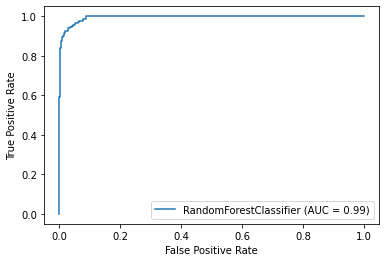

In [397]:
plot_roc_curve(RF_tuned , xtrain , ytrain)

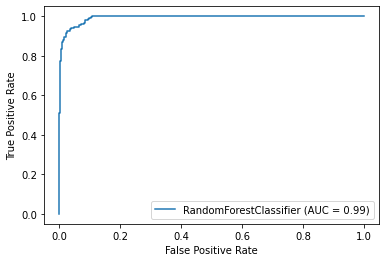

In [398]:
plot_roc_curve(RF_tuned , xtest , ytest)

In [399]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(RF_tuned , x2, y2 , cv=kf , scoring='roc_auc')
bias_rf2 = np.mean(1-score)
variance_rf2 = np.std(score , ddof=1)
print(bias_rf2 , variance_rf2)

0.009825673540696633 0.0016034238760361575


In [400]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN_tuned))
models.append(('DecisionTree',DT_tuned))
models.append(('RandomForest',RF_tuned))


Logistic: 0.160311 (0.008705)
NaiveBayes: 0.214282 (0.015198)
KNN: 0.146255 (0.007272)
DecisionTree: 0.023544 (0.005539)
RandomForest: 0.009512 (0.002020)


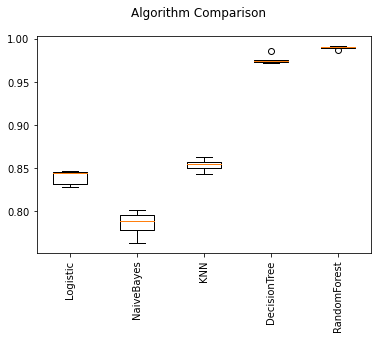

In [401]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, x2, y2,cv=kf, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Logistic: 0.233649 (0.029764)
NaiveBayes: 0.409495 (0.028506)
KNN: 0.242959 (0.032930)
DecisionTree: 0.040639 (0.008634)
RandomForest: 0.081429 (0.013769)


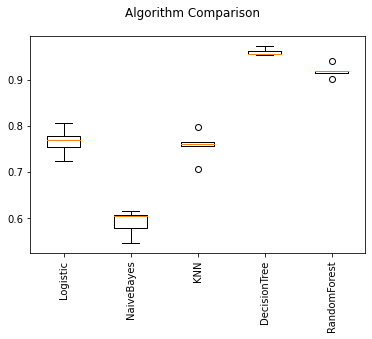

In [402]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, x2, y2,cv=kf, scoring='precision')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [403]:
data.shape

(3998, 40)

In [404]:
data.columns

Index(['Gender_F', 'Gender_M', '10board_CBSE', '10board_ICSE',
       '10board_State Board', '12board_CBSE', '12board_ISC',
       '12board_State Board', 'CollegeTier_1.0', 'CollegeTier_2.0',
       'Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.',
       'Degree_MCA', 'Specialization_civil engineering',
       'Specialization_computer science & engineering',
       'Specialization_electronics engineering',
       'Specialization_mechanical engineering',
       'Specialization_medical engineering', 'Specialization_other',
       'CollegeCityTier_0.0', 'CollegeCityTier_1.0', '10percentage',
       '12graduation', '12percentage', 'collegeGPA', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Number_Of_Optional_Subjects',
       'Optional_Marks', 'Age', 'Domain', 'conscientiousness', 'agreeableness',
       'extraversion', 'nueroticism', 'openess_to_experience', 'Salary_Class'],
      dtype='object')

# SMOTE and NEAR MISS

In [405]:
from imblearn.over_sampling import SMOTE

In [406]:
x3 = data.drop('Salary_Class',1)
y3 = data['Salary_Class']

In [407]:
sm = SMOTE(random_state=2 ,k_neighbors=3)

In [408]:
x3_res , y3_res = sm.fit_sample(x3 , y3.ravel())

In [409]:
print(x3_res.shape , y3_res.shape)

(7684, 39) (7684,)


In [410]:
y3.value_counts()

0    3842
1     156
Name: Salary_Class, dtype: int64

In [411]:
pd.Series(y3_res).value_counts()

1    3842
0    3842
dtype: int64

# Logistic Regression - SMOTE selected features

In [412]:
xtrain , xtest , ytrain , ytest = train_test_split(x3_res , y3_res , test_size=0.3 , random_state=0)

In [413]:
#xtrain_res , ytrain_res = sm.fit_sample(xtrain , ytrain.ravel())

In [414]:
LR = LogisticRegression(C = 0.02)
LR.fit(xtrain,ytrain)

ypred_train = LR.predict(xtrain)
ypred_test = LR.predict(xtest)

In [415]:
print(accuracy_score(ytrain , ypred_train))

0.8817404239494235


In [416]:
print(accuracy_score(ytest , ypred_test))

0.8781439722463139


In [417]:
print(classification_report(ytrain ,ypred_train ))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88      2694
           1       0.88      0.89      0.88      2684

    accuracy                           0.88      5378
   macro avg       0.88      0.88      0.88      5378
weighted avg       0.88      0.88      0.88      5378



In [418]:
print(classification_report(ytest ,ypred_test ))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1148
           1       0.88      0.88      0.88      1158

    accuracy                           0.88      2306
   macro avg       0.88      0.88      0.88      2306
weighted avg       0.88      0.88      0.88      2306



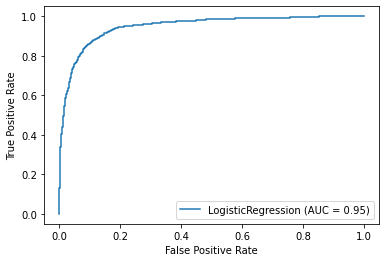

In [419]:
plot_roc_curve(LR , xtrain , ytrain)

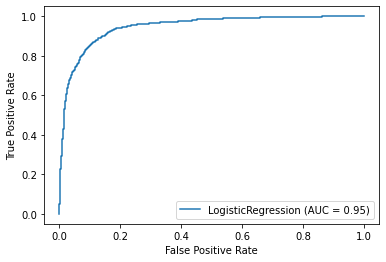

In [420]:
plot_roc_curve(LR , xtest , ytest)

In [421]:
confusion_matrix(ytest , ypred_test)

array([[1002,  146],
       [ 135, 1023]])

In [422]:
x3_res.shape , y3_res.shape

((7684, 39), (7684,))

In [423]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(LR , x3_res ,y3_res , cv=kf , scoring='roc_auc')
bias_lr2 = np.mean(1-score)
variance_lr2 = np.std(score , ddof=1)
print(round(bias_lr2,4) , variance_lr2)

0.0503 0.006684887081882378


In [424]:
x3_res

,Gender_F,Gender_M,10board_CBSE,10board_ICSE,10board_State Board,12board_CBSE,12board_ISC,12board_State Board,CollegeTier_1.0,CollegeTier_2.0,...,Quant,Number_Of_Optional_Subjects,Optional_Marks,Age,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,1,0,0,0,1,0,0,1,0,1,...,0.095037,-0.747762,0.294206,0.241881,0.635979,0.973700,0.812800,0.526900,1.354900,-0.445500
1,0,1,1,0,0,1,0,0,0,1,...,2.180295,-0.747762,0.469580,0.807731,0.960603,-0.733500,0.378900,1.239600,-0.107600,0.863700
2,1,0,1,0,0,1,0,0,0,1,...,-1.172473,-0.747762,-0.123351,-0.889820,0.450877,0.271800,1.710900,0.163700,-0.868200,0.672100
3,0,1,1,0,0,1,0,0,1,0,...,0.912785,-0.747762,1.713898,0.807731,0.974396,0.046400,0.344800,-0.344000,-0.407800,-0.919400
4,0,1,1,0,0,1,0,0,0,1,...,-0.395612,-0.747762,-1.476233,-0.323970,0.124502,-0.881000,-0.279300,-1.069700,0.091630,-0.129500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7679,0,1,1,0,0,1,0,0,0,1,...,1.155809,0.533875,0.037722,-0.240860,0.552721,-0.510147,0.089801,-0.371419,0.458064,0.204240
7680,0,1,0,0,0,0,0,0,0,1,...,0.318687,-0.747762,0.787831,1.290407,0.796354,-2.549517,0.542147,-0.241471,0.328443,-1.030966
7681,0,1,0,0,0,0,0,0,0,1,...,0.671744,-0.747762,-0.039641,2.564562,0.708974,0.811055,0.147524,0.175403,-0.005682,-0.553461
7682,0,1,0,0,1,0,0,1,0,0,...,-0.351569,-0.747762,1.592717,1.373581,0.967594,0.180090,0.854810,0.681769,-0.228080,1.404999


# KNN - SMOTE ALL features

In [425]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x3_res , y3_res , test_size=0.3 , random_state=0 )

In [426]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)

KNeighborsClassifier()

In [427]:
ypred_train_knn3 = KNN.predict(xtrain)
ypred_test_knn3 = KNN.predict(xtest)

In [428]:
print(accuracy_score(ytrain, ypred_train_knn3))

0.9302714763852733


In [429]:
print(accuracy_score(ytest, ypred_test_knn3))

0.9019947961838681


In [430]:
print(classification_report(ytrain , ypred_train_knn3))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      2694
           1       0.88      1.00      0.93      2684

    accuracy                           0.93      5378
   macro avg       0.94      0.93      0.93      5378
weighted avg       0.94      0.93      0.93      5378



In [431]:
print(classification_report(ytest , ypred_test_knn3))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89      1148
           1       0.84      1.00      0.91      1158

    accuracy                           0.90      2306
   macro avg       0.92      0.90      0.90      2306
weighted avg       0.92      0.90      0.90      2306



In [432]:
confusion_matrix(ytrain , ypred_train_knn3)

array([[2319,  375],
       [   0, 2684]])

In [433]:
confusion_matrix(ytest , ypred_test_knn3)

array([[ 922,  226],
       [   0, 1158]])

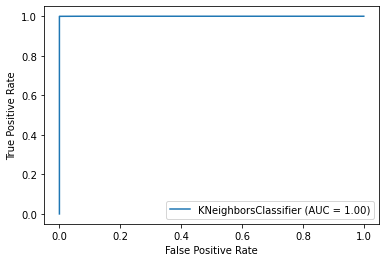

In [434]:
plot_roc_curve(KNN, xtrain , ytrain)

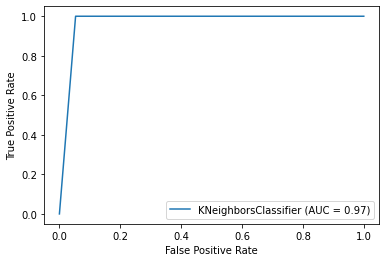

In [435]:
plot_roc_curve(KNN, xtest , ytest)

In [436]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN , x3_res, y3_res , cv=kf , scoring='roc_auc')
bias_knn3 = np.mean(1-score)
variance_knn3 = np.std(score , ddof=1)
print(bias_knn3 , variance_knn3)

0.02774768427516534 0.002627883840216128


In [437]:
#tune knn model
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':np.arange(1,100) , 'weights':['uniform','distance']}
GS = GridSearchCV(KNN , params ,cv=10 , scoring='roc_auc')
GS.fit(x3_res , y3_res)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [438]:
GS.best_params_
#redefining model and running the steps again

{'n_neighbors': 29, 'weights': 'distance'}

In [439]:
KNN = KNeighborsClassifier(n_neighbors=29 , weights='distance' , metric='manhattan')

In [440]:
KNN.fit(xtrain , ytrain)

KNeighborsClassifier(metric='manhattan', n_neighbors=29, weights='distance')

In [441]:
ypred_knn_train_tuned = KNN.predict(xtrain)
ypred_knn_test_tuned = KNN.predict(xtest)

In [442]:
print(accuracy_score(ytrain ,ypred_knn_train_tuned ))
print(accuracy_score(ytest ,ypred_knn_test_tuned ))

1.0
0.8872506504770165


In [443]:
print(classification_report(ytrain ,ypred_knn_train_tuned ))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2684

    accuracy                           1.00      5378
   macro avg       1.00      1.00      1.00      5378
weighted avg       1.00      1.00      1.00      5378



In [444]:
print(classification_report(ytest ,ypred_knn_test_tuned ))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1148
           1       0.82      1.00      0.90      1158

    accuracy                           0.89      2306
   macro avg       0.91      0.89      0.89      2306
weighted avg       0.91      0.89      0.89      2306



In [445]:
print(confusion_matrix(ytrain , ypred_knn_train_tuned))

[[2694    0]
 [   0 2684]]


In [446]:
print(confusion_matrix(ytest ,ypred_knn_test_tuned))

[[ 888  260]
 [   0 1158]]


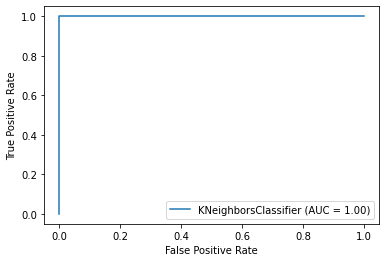

In [447]:
plot_roc_curve(KNN , xtrain , ytrain)

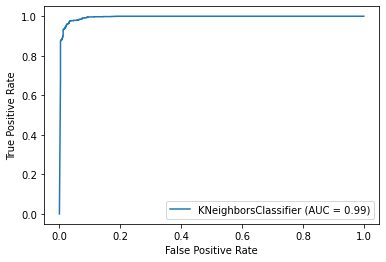

In [448]:
plot_roc_curve(KNN , xtest , ytest)

In [449]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(KNN , x3_res, y3_res , cv=kf , scoring='roc_auc')
bias_knn_tuned = np.mean(1-score)
variance_knn_tuned = np.std(score , ddof=1)
print(bias_knn_tuned , variance_knn_tuned)

0.006311439523437023 0.0008561219261322417


# Naive Bayes Smote - Selective Features

In [450]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x3_res[selected] , y3_res , test_size=0.3 , random_state=0 )

In [451]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(xtrain , ytrain)

GaussianNB()

In [452]:
ypred_train_gb2 = NB.predict(xtrain)
ypred_test_gb2 = NB.predict(xtest)

In [453]:
print(accuracy_score(ytrain , ypred_train_gb2))
print(accuracy_score(ytest , ypred_test_gb2))

0.7919300855336556
0.7918473547267997


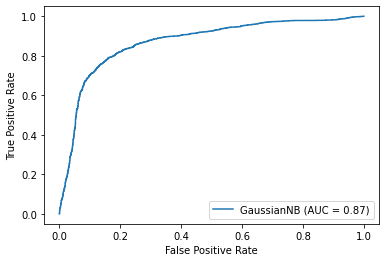

In [454]:
plot_roc_curve(NB , xtrain , ytrain)

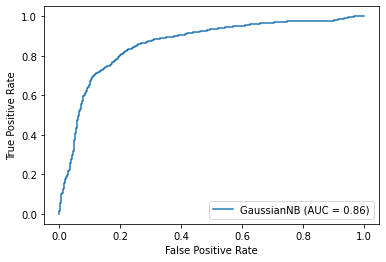

In [455]:
plot_roc_curve(NB , xtest , ytest)

In [456]:
print(classification_report(ytrain , ypred_train_gb2))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      2694
           1       0.75      0.88      0.81      2684

    accuracy                           0.79      5378
   macro avg       0.80      0.79      0.79      5378
weighted avg       0.80      0.79      0.79      5378



In [457]:
print(classification_report(ytest , ypred_test_gb2))

              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1148
           1       0.75      0.87      0.81      1158

    accuracy                           0.79      2306
   macro avg       0.80      0.79      0.79      2306
weighted avg       0.80      0.79      0.79      2306



In [458]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(NB , x3_res, y3_res , cv=kf , scoring='roc_auc')
bias_nb2 = np.mean(1-score)
variance_nb2 = np.std(score , ddof=1)
print(bias_nb2 , variance_nb2)

0.1300802150186359 0.010671791105568748


# Decision Tree - SMOTE all features**

In [459]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x3_res , y3_res , test_size=0.3 , random_state=0 )

In [460]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=0)
DT.fit(xtrain , ytrain)

DecisionTreeClassifier(random_state=0)

In [461]:
ypred_train_dt1 = DT.predict(xtrain)
ypred_test_dt1 = DT.predict(xtest)

In [462]:
print(accuracy_score(ytrain , ypred_train_dt1))
print(accuracy_score(ytest , ypred_test_dt1))

1.0
0.9410234171725932


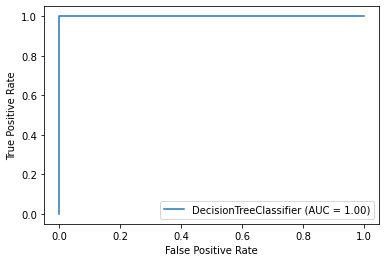

In [463]:
plot_roc_curve(DT , xtrain , ytrain)

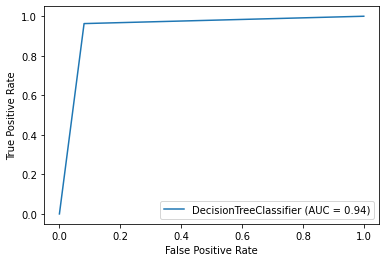

In [464]:
plot_roc_curve(DT , xtest , ytest)

In [465]:
print(classification_report(ytrain , ypred_train_dt1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2684

    accuracy                           1.00      5378
   macro avg       1.00      1.00      1.00      5378
weighted avg       1.00      1.00      1.00      5378



In [466]:
print(classification_report(ytest , ypred_test_dt1))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1148
           1       0.92      0.96      0.94      1158

    accuracy                           0.94      2306
   macro avg       0.94      0.94      0.94      2306
weighted avg       0.94      0.94      0.94      2306



In [467]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(DT , x3_res, y3_res , cv=kf , scoring='roc_auc')
bias_dt1 = np.mean(1-score)
variance_dt1 = np.std(score , ddof=1)
print(bias_dt1 , variance_dt1)

0.054656589293937574 0.003438295012953395


In [468]:
#Tuning a decision tree

In [469]:
params = {'criterion':['gini','entropy'],'max_depth':np.arange(1,100)}
Grid = GridSearchCV(DT , params , cv=10 , scoring='f1_weighted')
Grid.fit(x3_res,y3_res)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [470]:
Grid.best_params_

{'criterion': 'entropy', 'max_depth': 17}

In [471]:
#redefine model

In [472]:
DT_tuned = DecisionTreeClassifier(max_depth=17 , criterion='entropy')

In [473]:
DT_tuned.fit(xtrain , ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=17)

In [474]:
ypred_train_dt_tuned = DT_tuned.predict(xtrain)
ypred_test_dt_tuned = DT_tuned.predict(xtest)

In [475]:
print(accuracy_score(ytrain,ypred_train_dt_tuned)*100)
print(accuracy_score(ytest,ypred_test_dt_tuned)*100)
#testing accuracy has increased by 7 percent

99.86984008925252
94.75281873373808


In [476]:
print(classification_report(ytrain,ypred_train_dt_tuned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2694
           1       1.00      1.00      1.00      2684

    accuracy                           1.00      5378
   macro avg       1.00      1.00      1.00      5378
weighted avg       1.00      1.00      1.00      5378



In [477]:
print(classification_report(ytest,ypred_test_dt_tuned))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95      1148
           1       0.93      0.97      0.95      1158

    accuracy                           0.95      2306
   macro avg       0.95      0.95      0.95      2306
weighted avg       0.95      0.95      0.95      2306



In [478]:
print(confusion_matrix(ytrain,ypred_train_dt_tuned))

[[2687    7]
 [   0 2684]]


In [479]:
print(confusion_matrix(ytest,ypred_test_dt_tuned))

[[1060   88]
 [  33 1125]]


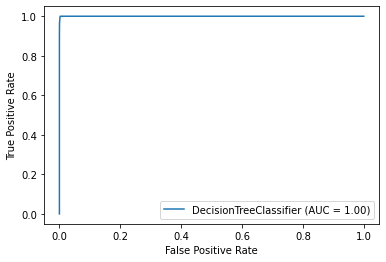

In [480]:
plot_roc_curve(DT_tuned , xtrain , ytrain)

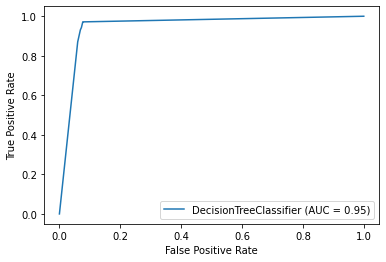

In [481]:
plot_roc_curve(DT_tuned , xtest , ytest)

In [482]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(DT_tuned , x3_res, y3_res , cv=kf , scoring='roc_auc')
bias_dt_tuned1 = np.mean(1-score)
variance_dt_tuned1 = np.std(score , ddof=1)
print(bias_dt_tuned1 , variance_dt_tuned1)

0.05244486003030717 0.006008919977900459



# Random Forest - SMOTE all features

In [483]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x3_res , y3_res , test_size=0.3 , random_state=0 )

In [484]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=0 ,max_depth=7)
RF.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=7, random_state=0)

In [485]:
ypred_train_rf1 = RF.predict(xtrain)
ypred_test_rf1 = RF.predict(xtest)

In [486]:
print(accuracy_score( ytrain, ypred_train_rf1))

0.94644849386389


In [487]:
print(accuracy_score(ytest , ypred_test_rf1))

0.9301821335646141


In [488]:
print(classification_report(ytrain , ypred_train_rf1))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2694
           1       0.93      0.96      0.95      2684

    accuracy                           0.95      5378
   macro avg       0.95      0.95      0.95      5378
weighted avg       0.95      0.95      0.95      5378



In [489]:
print(classification_report(ytest , ypred_test_rf1))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      1148
           1       0.92      0.95      0.93      1158

    accuracy                           0.93      2306
   macro avg       0.93      0.93      0.93      2306
weighted avg       0.93      0.93      0.93      2306



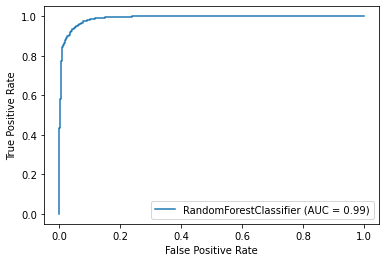

In [490]:
plot_roc_curve(RF , xtrain , ytrain)

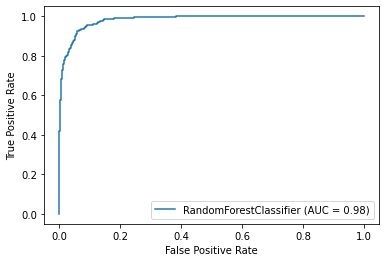

In [491]:
plot_roc_curve(RF , xtest , ytest)

In [492]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(RF , x3_res, y3_res , cv=kf , scoring='roc_auc')
bias_rf1 = np.mean(1-score)
variance_rf1 = np.std(score , ddof=1)
print(bias_rf1 , variance_rf1)

0.017702964031862244 0.00342940889254515


In [493]:
#Tune Random Forest 

In [494]:
rf_be=[]
rf_ve = []
for i in np.arange(1,100):
    RF = RandomForestClassifier(n_estimators=i ,max_depth=7, criterion='entropy',random_state=0)
    score = cross_val_score(RF , x3_res , y3_res , cv=kf , scoring='roc_auc')
    rf_be.append(np.mean(1-score))
    rf_ve.append(np.std(score,ddof=1))

In [495]:
np.min(rf_ve) , np.argmin(rf_ve) , rf_be[5]

(0.0023607059745449285, 5, 0.026787781040784876)

In [572]:
rf_be=[]
rf_ve = []
for i in np.arange(1,100):
    RF = RandomForestClassifier(n_estimators=i ,max_depth=7, criterion='gini',random_state=0)
    score = cross_val_score(RF , x3_res , y3_res , cv=kf , scoring='roc_auc')
    rf_be.append(np.mean(1-score))
    rf_ve.append(np.std(score,ddof=1))

In [573]:
np.min(rf_ve) , np.argmin(rf_ve) , rf_be[10]

(0.0018403102263358203, 6, 0.023788505762907496)

In [574]:
#REDEFine model

In [575]:
RF_tuned = RandomForestClassifier(n_estimators = 6 , max_depth=7 , criterion='entropy')

In [576]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain , ytest = train_test_split(x3_res , y3_res , test_size=0.3 , random_state=0 )

In [577]:
RF_tuned.fit(xtrain , ytrain)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=6)

In [578]:
ypred_train_rf2 = RF_tuned.predict(xtrain)
ypred_test_rf2 = RF_tuned.predict(xtest)

In [579]:
print(accuracy_score(ytrain ,ypred_train_rf2 ))
print(accuracy_score(ytest ,ypred_test_rf2 ))

0.9185570844179992
0.9058976582827407


In [580]:
print(classification_report(ytrain ,ypred_train_rf2 ))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      2694
           1       0.90      0.94      0.92      2684

    accuracy                           0.92      5378
   macro avg       0.92      0.92      0.92      5378
weighted avg       0.92      0.92      0.92      5378



In [581]:
print(classification_report(ytest ,ypred_test_rf2 ))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1148
           1       0.88      0.94      0.91      1158

    accuracy                           0.91      2306
   macro avg       0.91      0.91      0.91      2306
weighted avg       0.91      0.91      0.91      2306



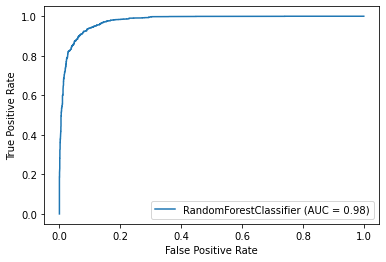

In [582]:
plot_roc_curve(RF_tuned , xtrain , ytrain)

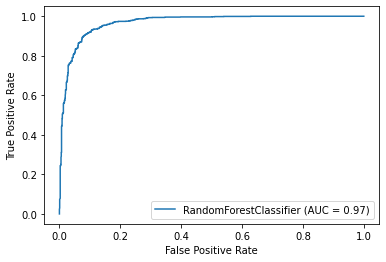

In [583]:
plot_roc_curve(RF_tuned , xtest , ytest)

In [584]:
from sklearn.model_selection import KFold , cross_val_score
kf = KFold(shuffle=True , n_splits=5 , random_state=0)
score = cross_val_score(RF_tuned , x3_res, y3_res , cv=kf , scoring='roc_auc')
bias_rf2 = np.mean(1-score)
variance_rf2 = np.std(score , ddof=1)
print(bias_rf2 , variance_rf2)

0.029165654235913663 0.00585937305990623


In [585]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN_tuned))
models.append(('DecisionTree',DT_tuned))
models.append(('RandomForest',RF_tuned))


Logistic: 0.078768 (0.005636)
NaiveBayes: 0.397717 (0.009830)
KNN: 0.175912 (0.003537)
DecisionTree: 0.055202 (0.006716)
RandomForest: 0.088524 (0.014514)


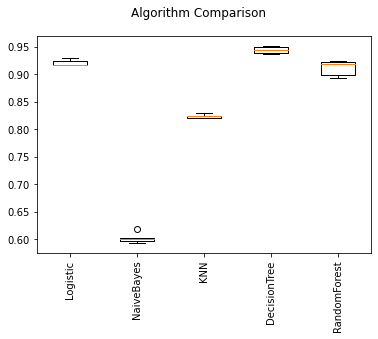

In [586]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	cv_results = cross_val_score(model, x3_res, y3_res ,cv=kf, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Logistic: 0.024392 (0.003524)
NaiveBayes: 0.130080 (0.010672)
KNN: 0.033066 (0.003994)
DecisionTree: 0.051209 (0.007230)
RandomForest: 0.029594 (0.004055)


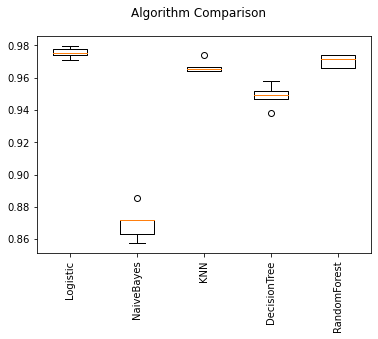

In [587]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	cv_results = cross_val_score(model, x3_res, y3_res ,cv=kf, scoring='roc_auc')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(1-cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()